In [38]:
import pandas as pd
df = pd.read_csv('training_set.csv')

In [39]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [41]:
s = df.isna().sum()
s

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [42]:
s[s>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# EDA

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
from custom_def import catconsep
cat, con = catconsep(df)

In [45]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [46]:
con

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [47]:
df[cat].describe().T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType      588      3  BrkFace   445
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [48]:
df[con].describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

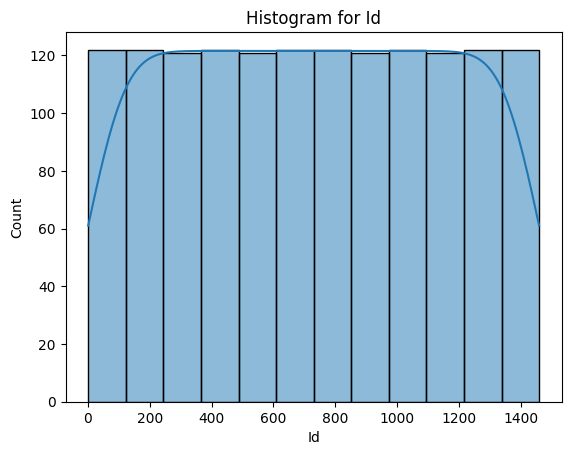

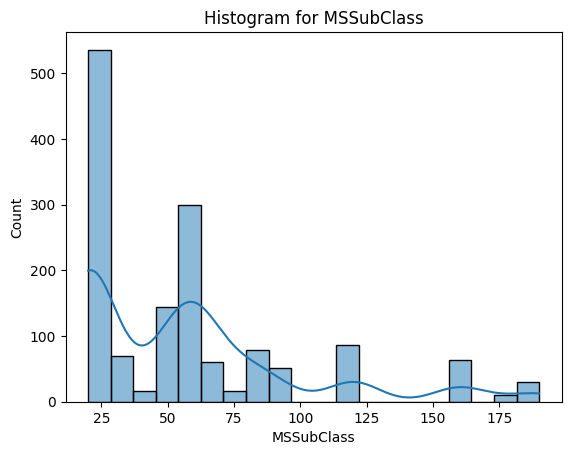

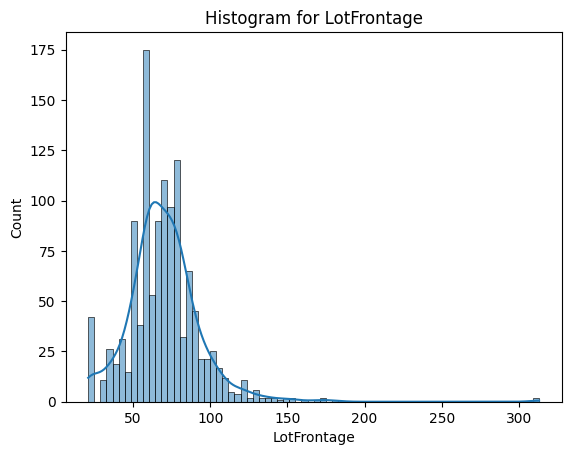

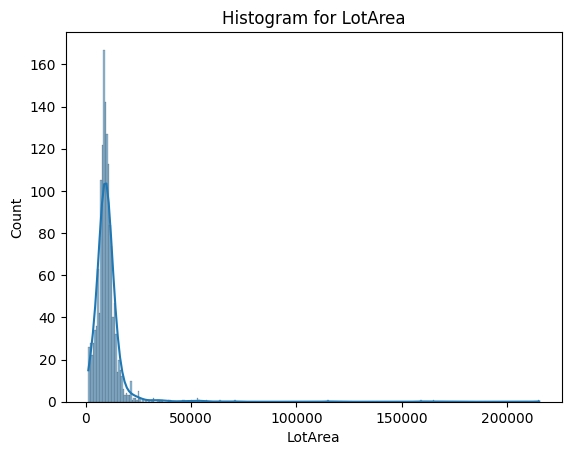

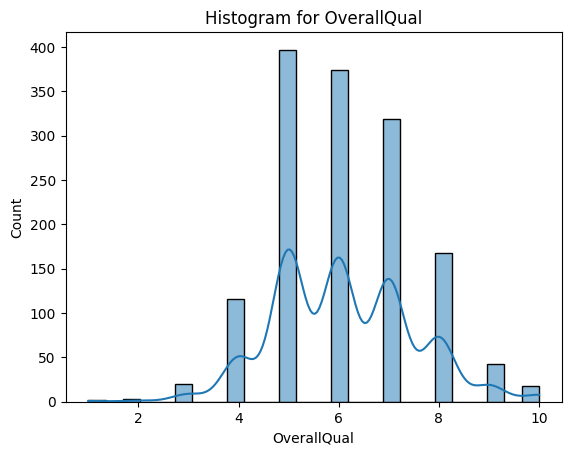

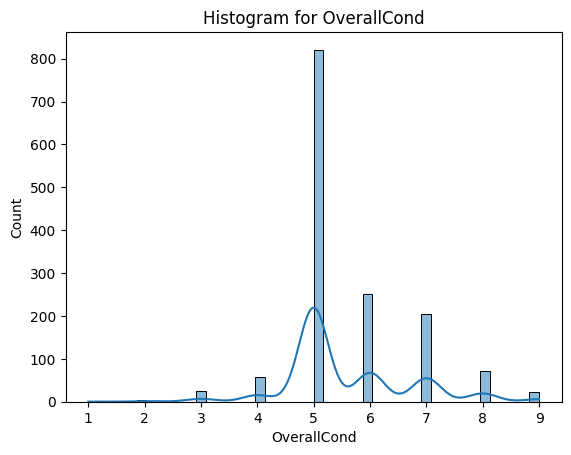

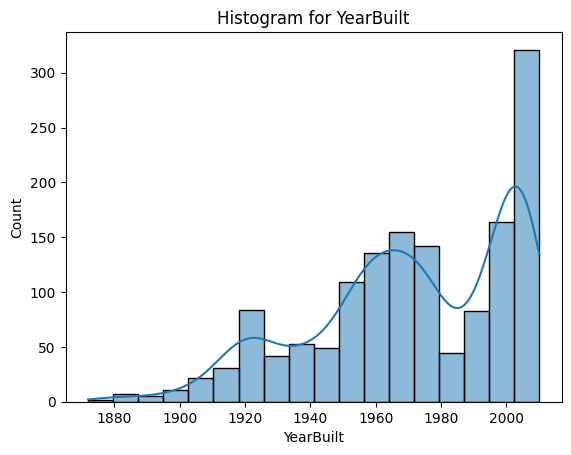

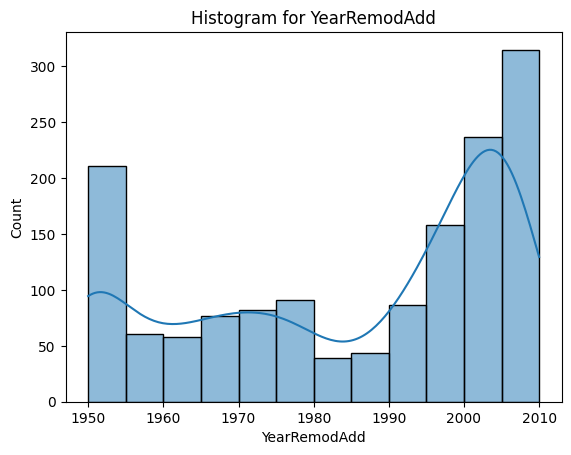

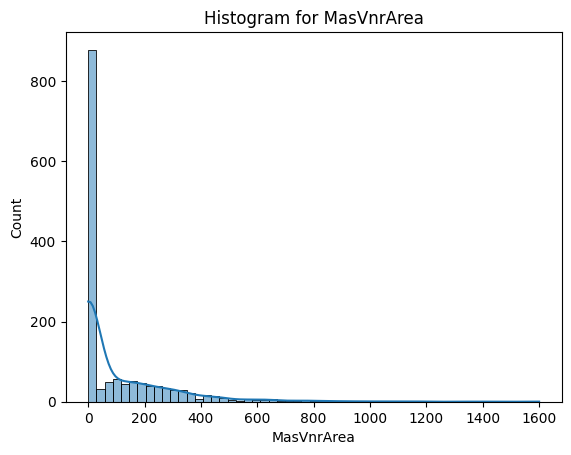

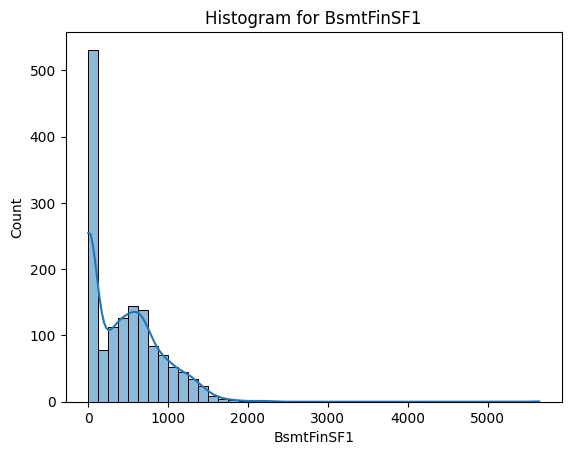

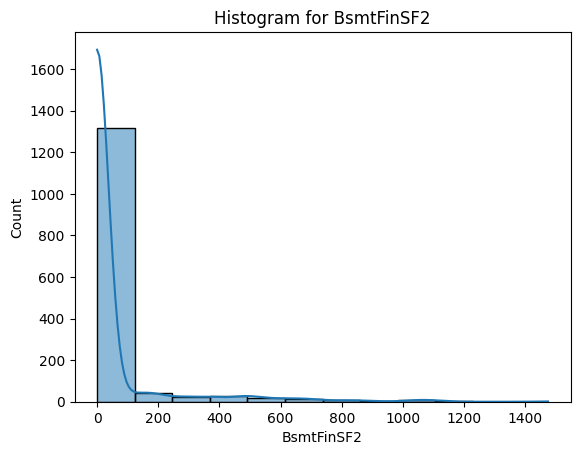

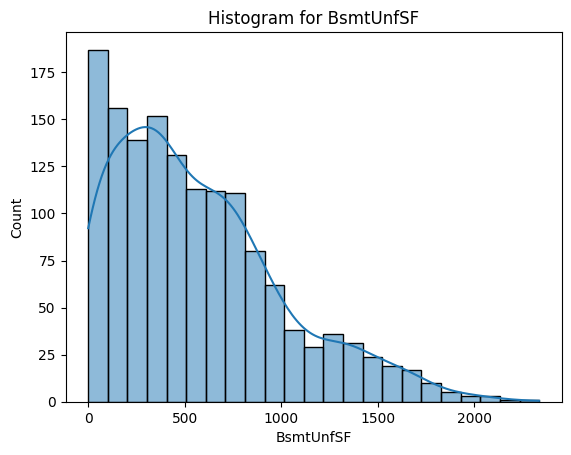

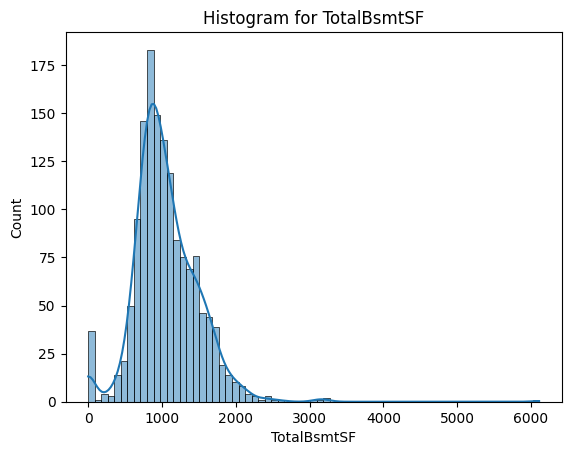

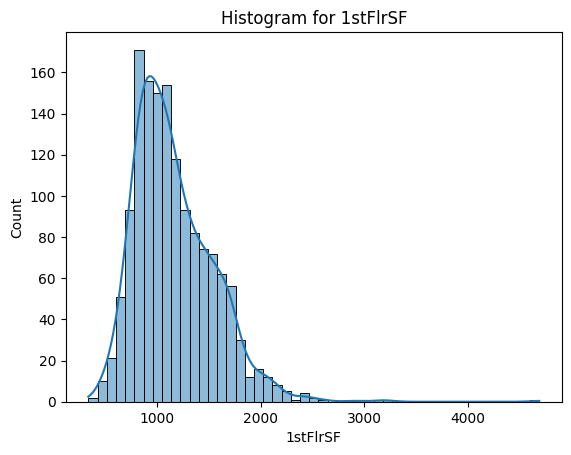

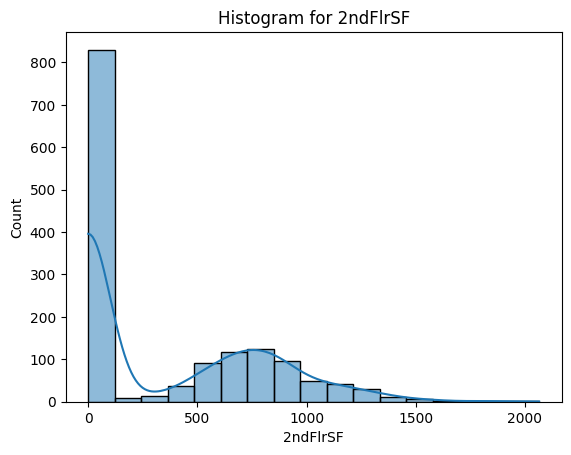

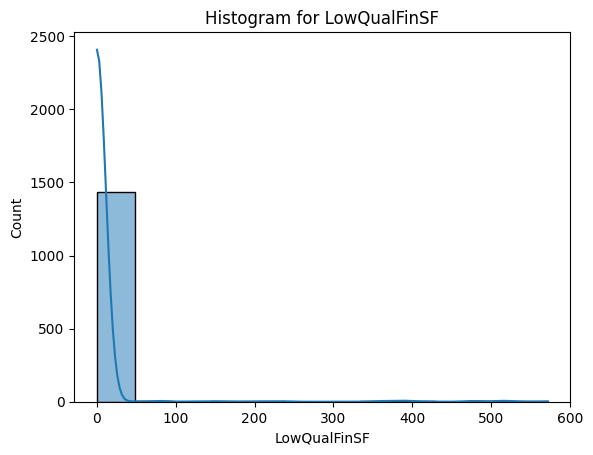

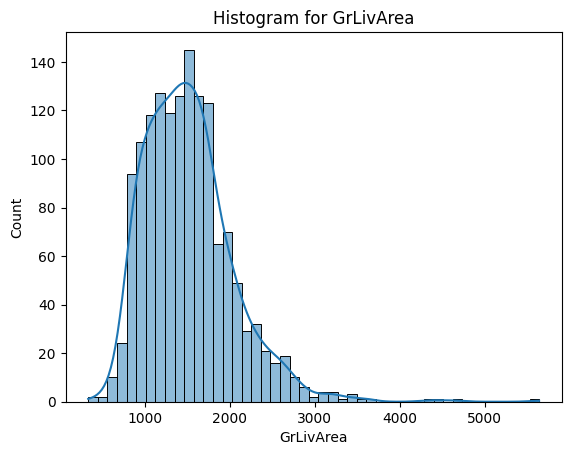

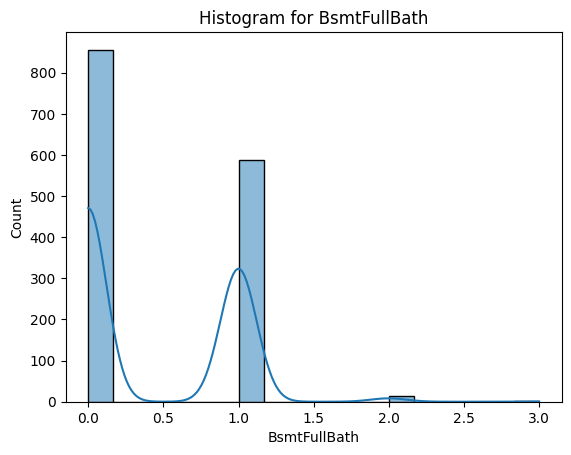

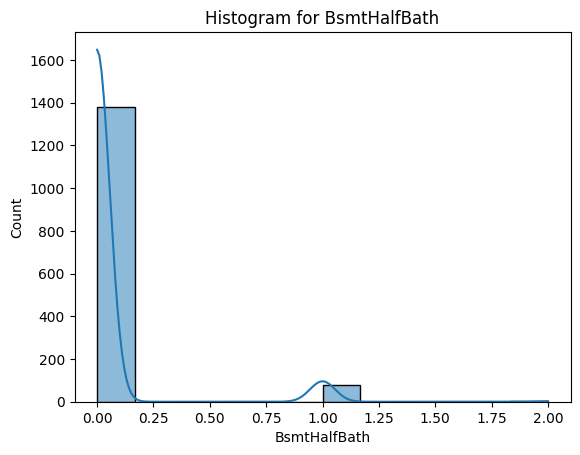

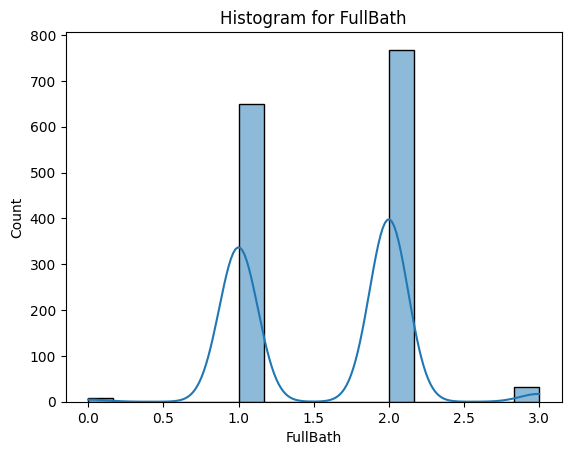

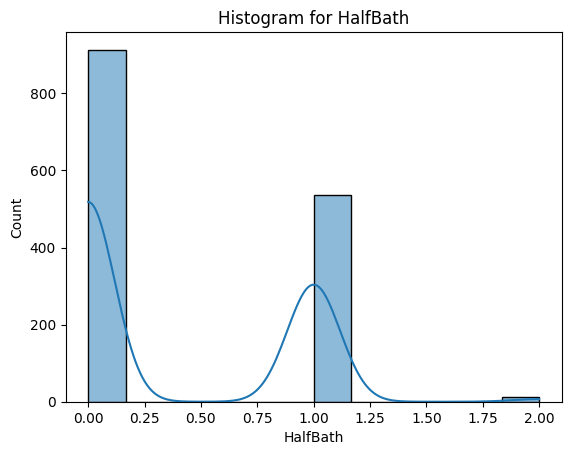

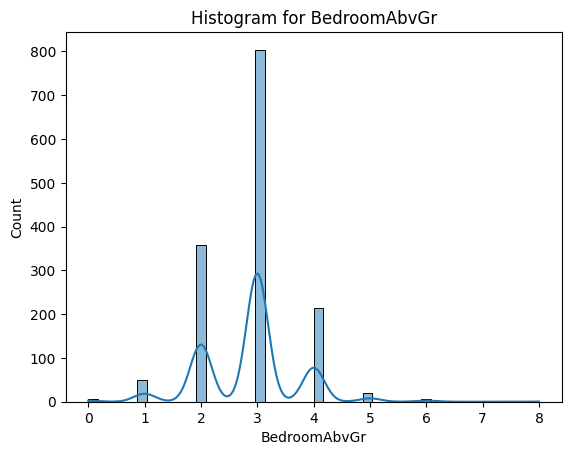

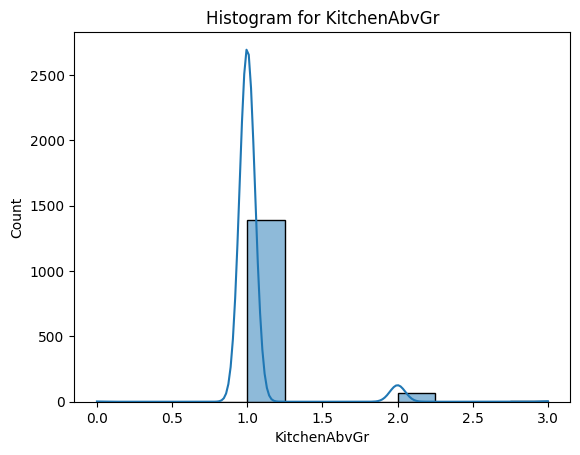

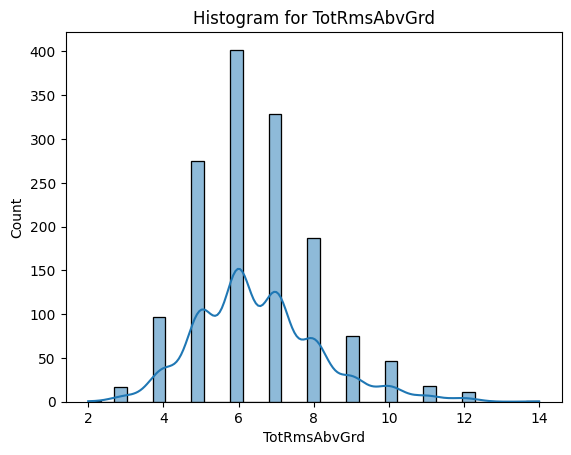

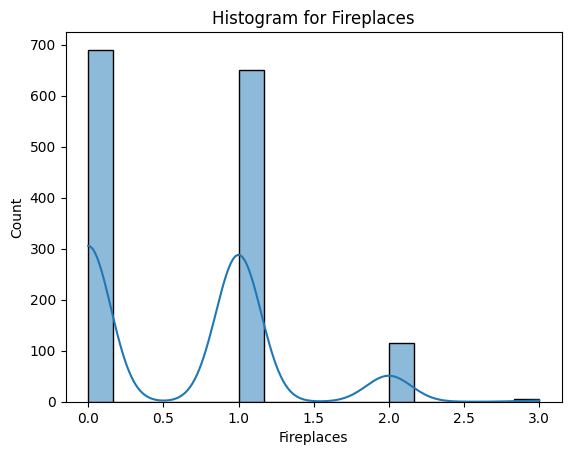

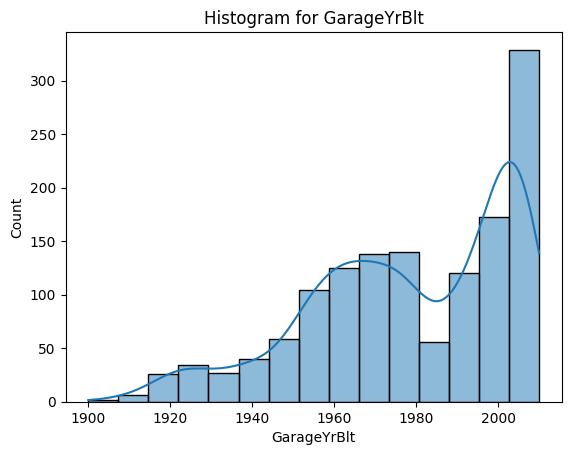

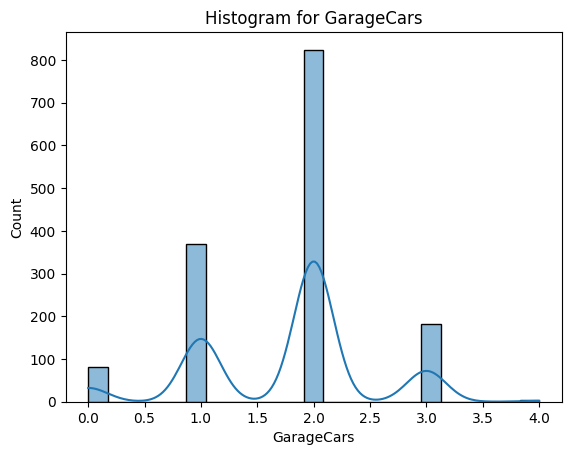

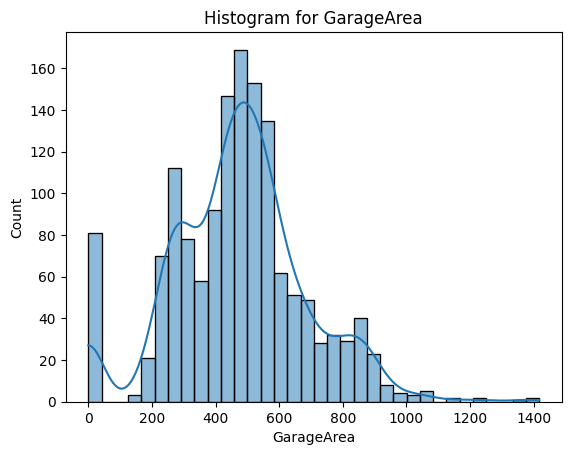

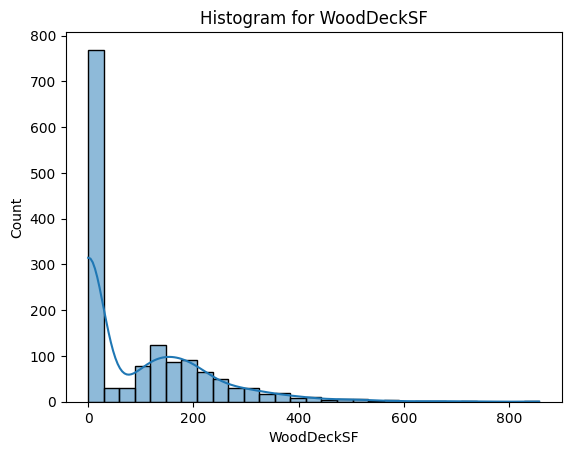

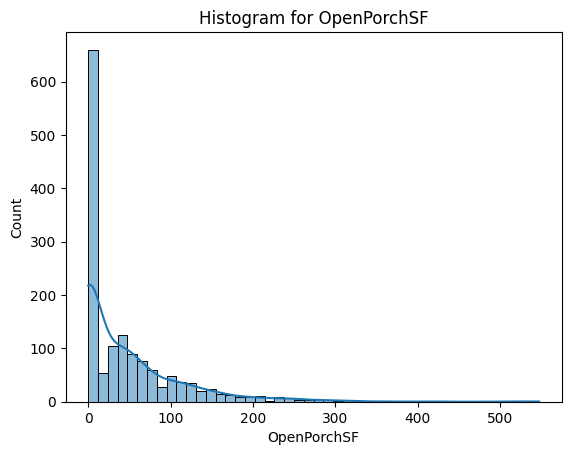

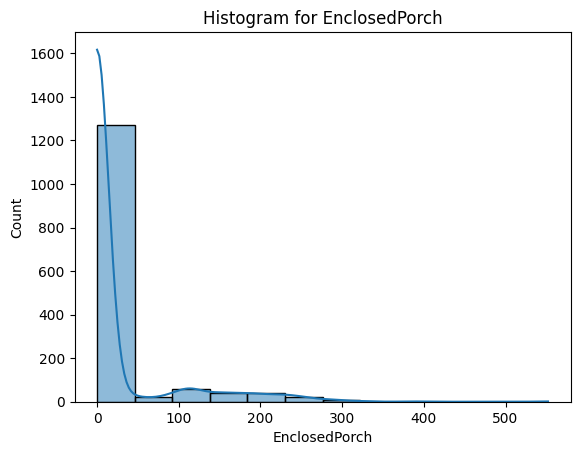

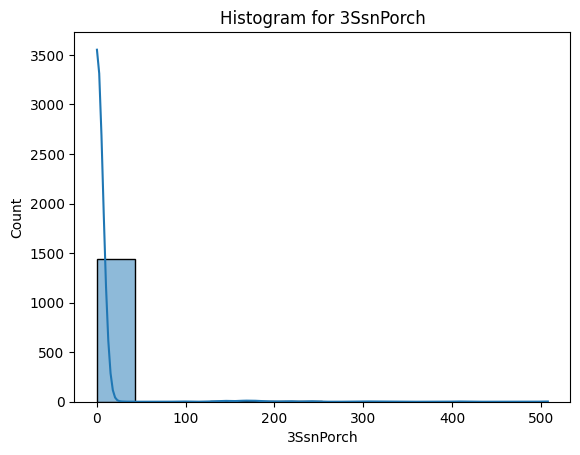

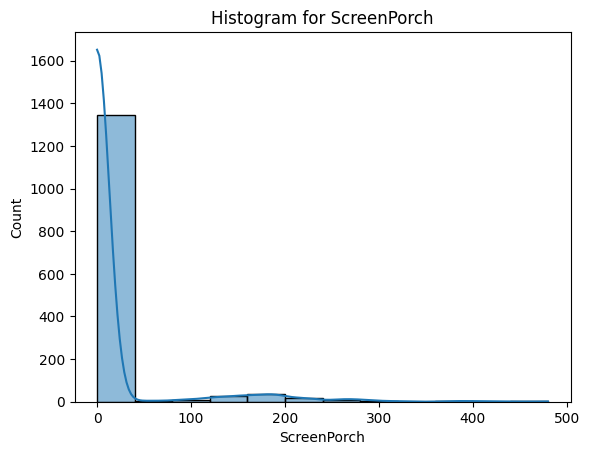

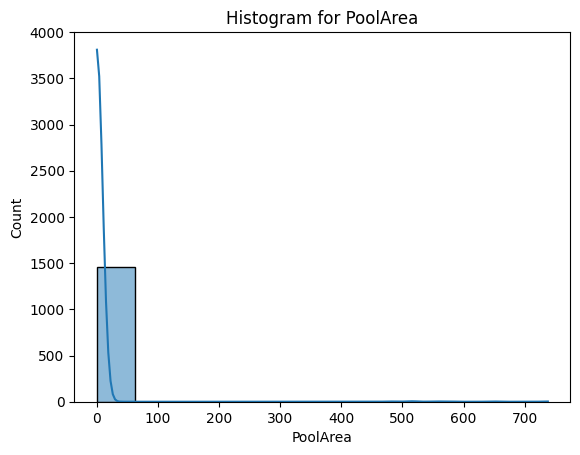

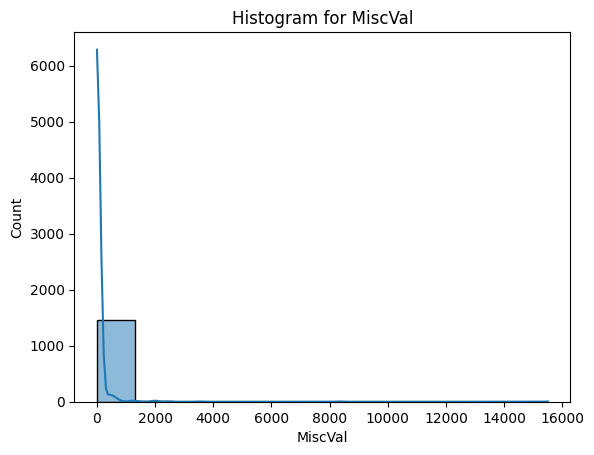

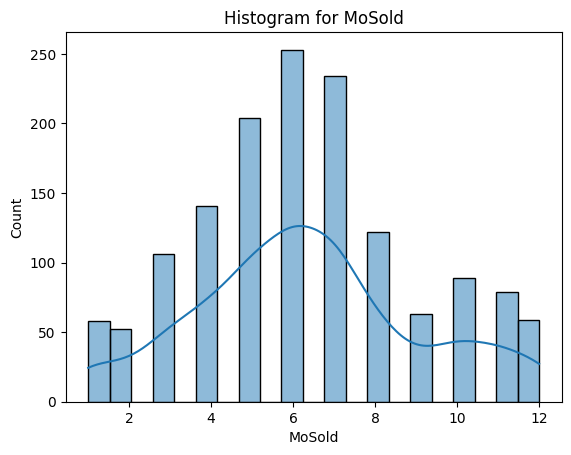

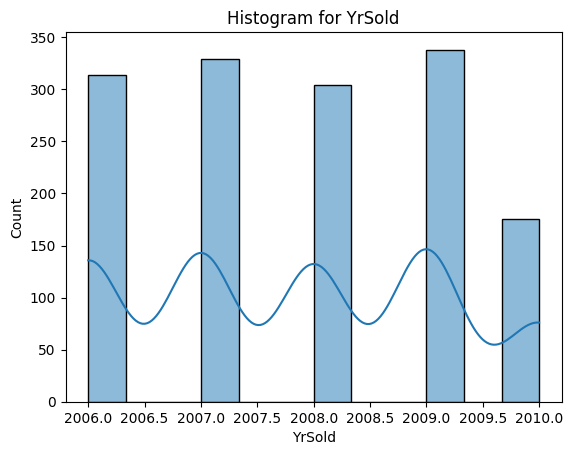

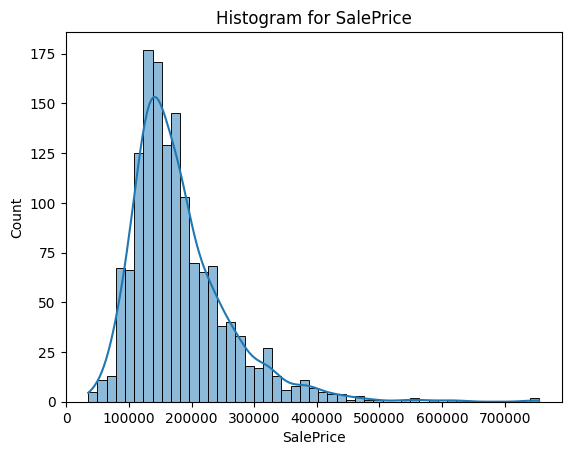

In [49]:
for i in con:
    sns.histplot(data=df,x=i,kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

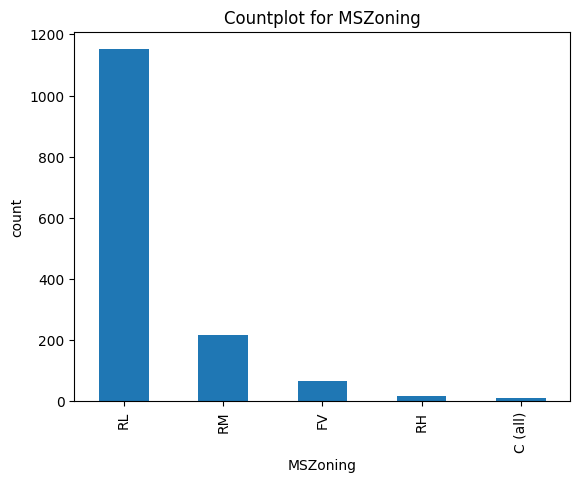

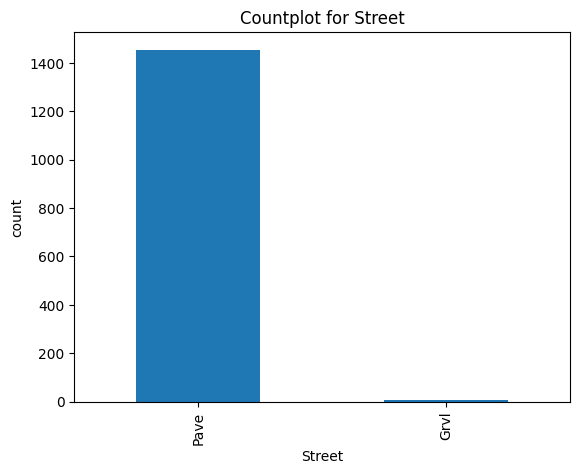

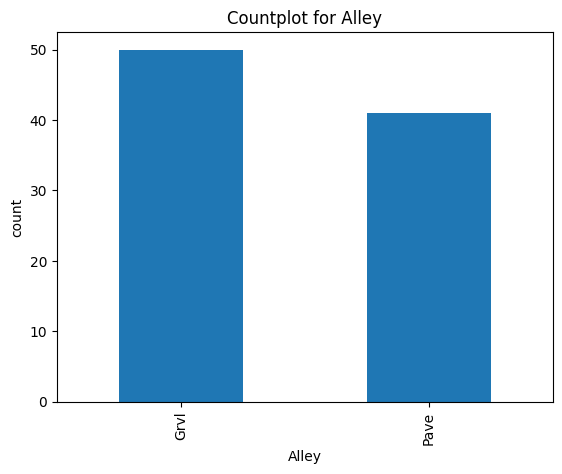

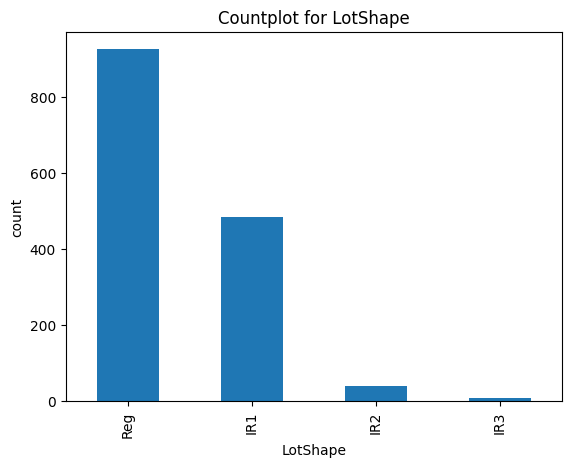

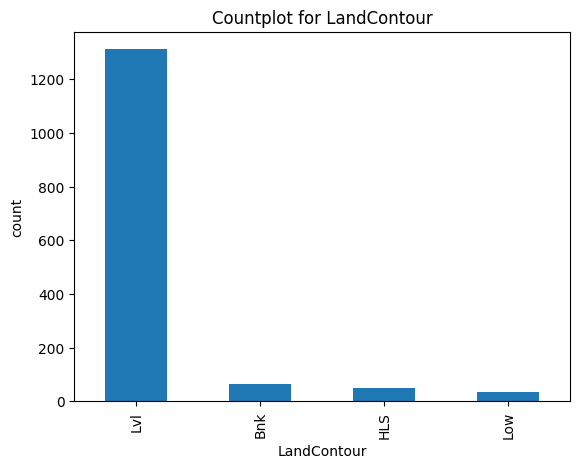

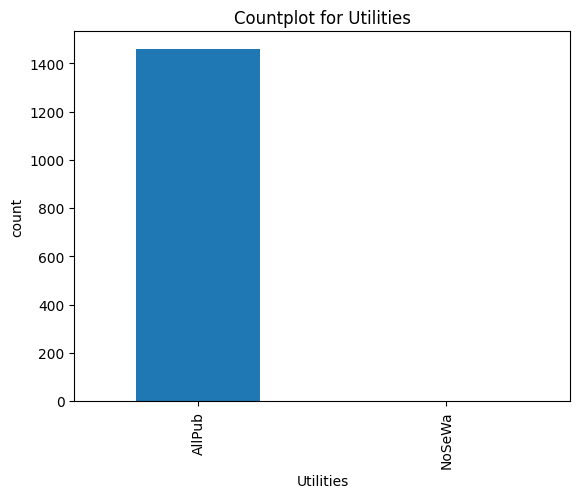

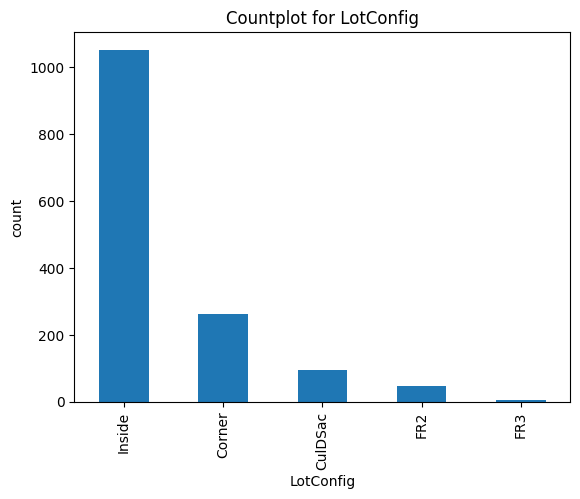

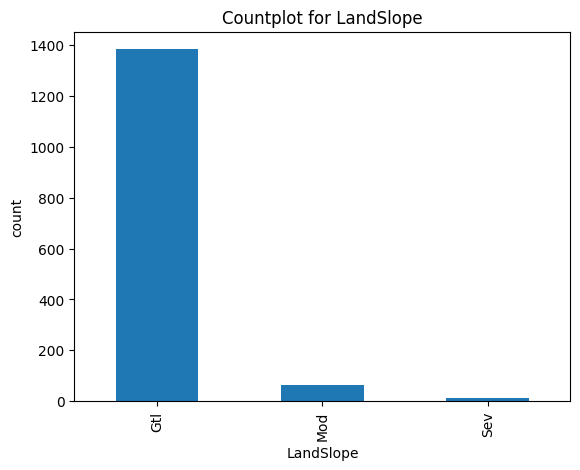

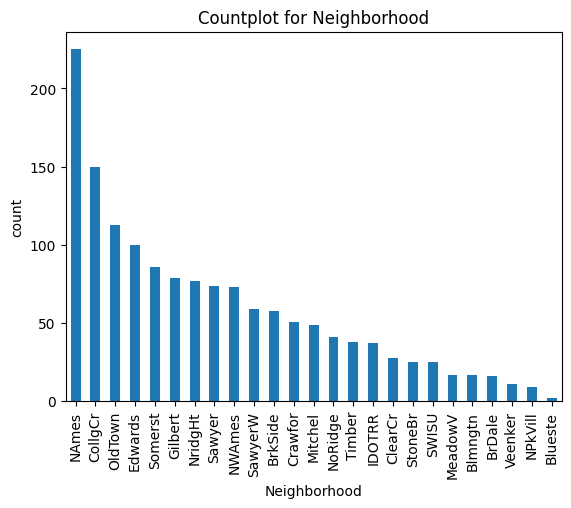

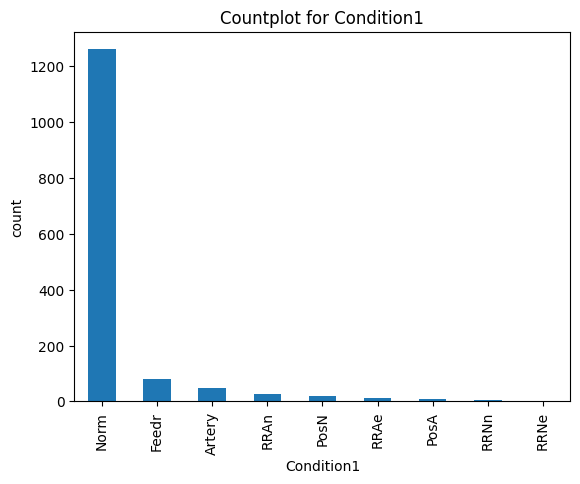

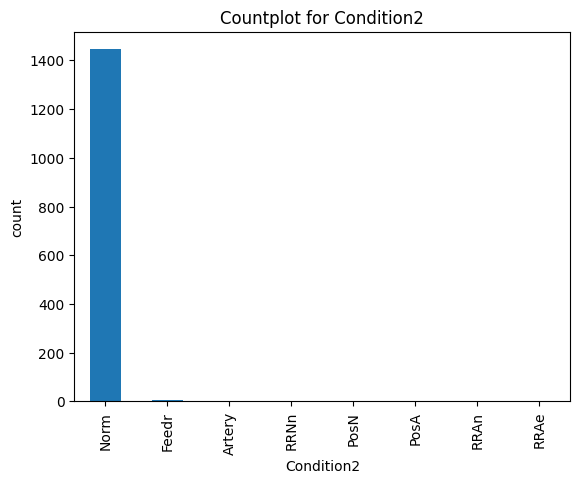

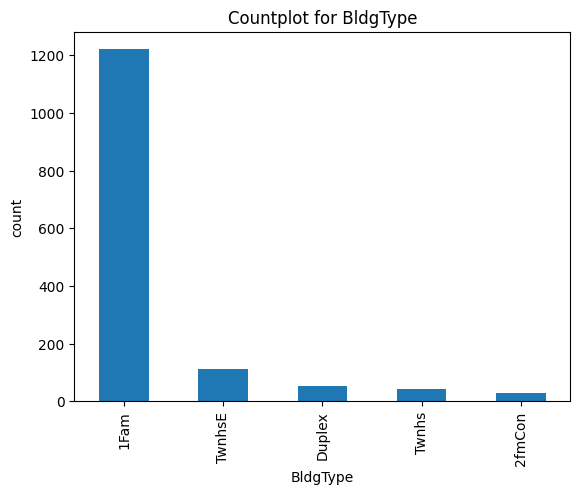

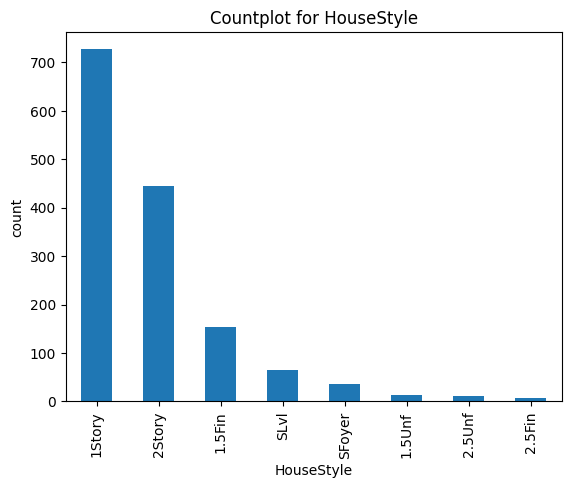

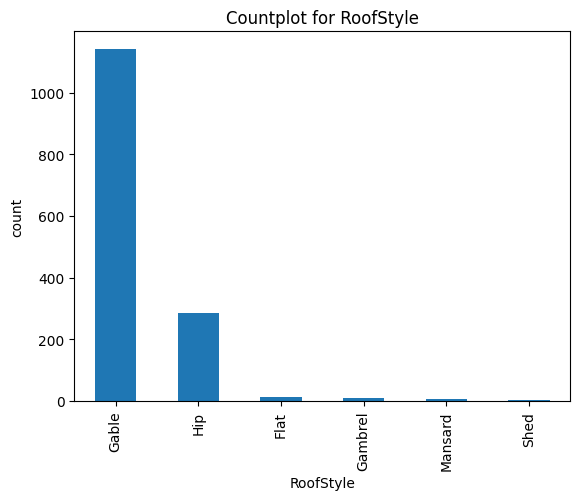

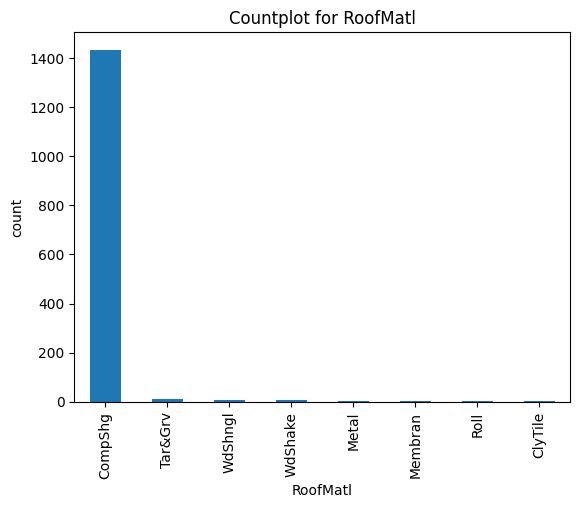

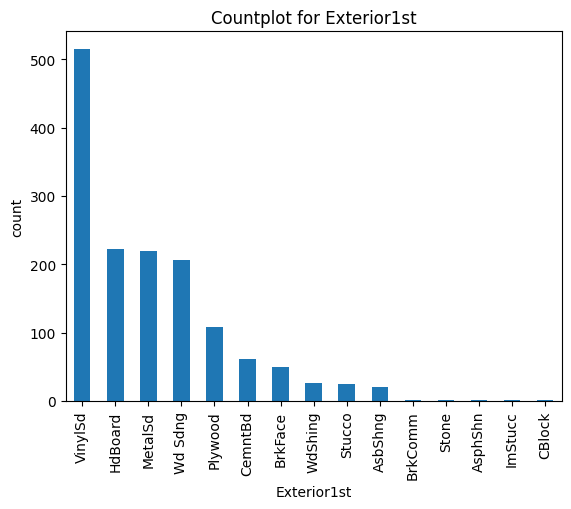

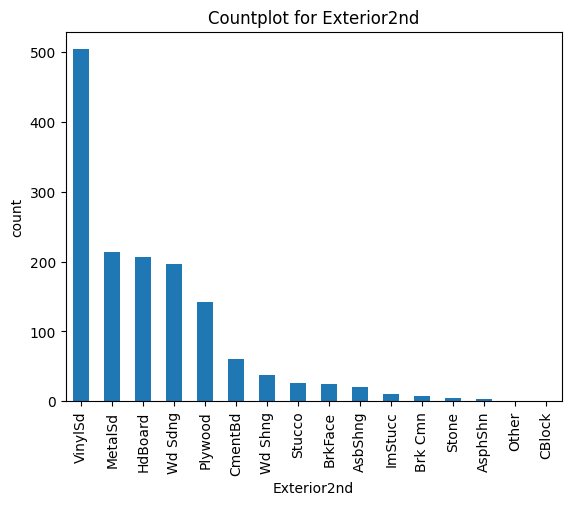

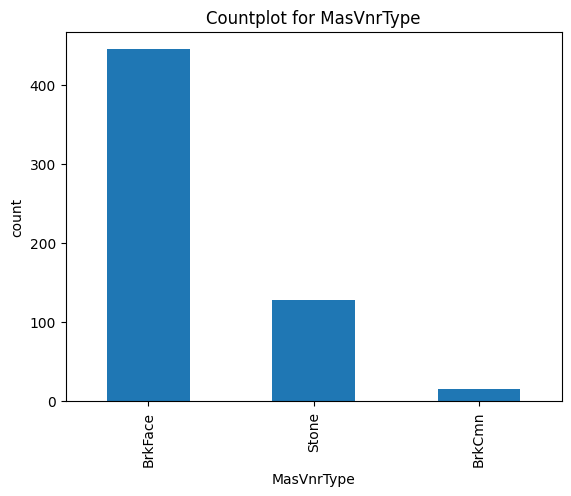

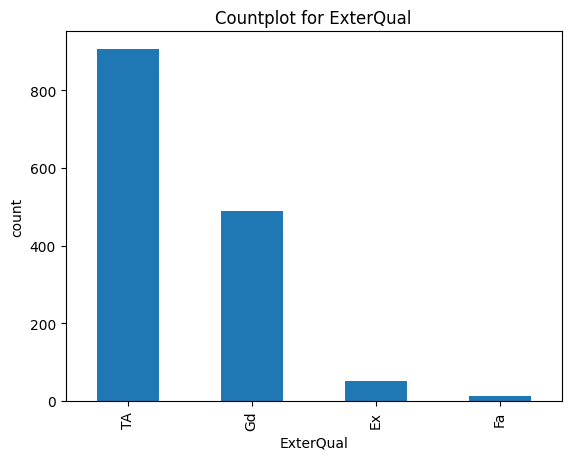

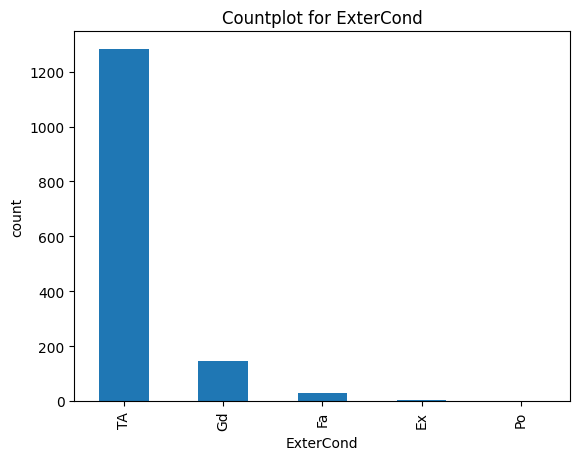

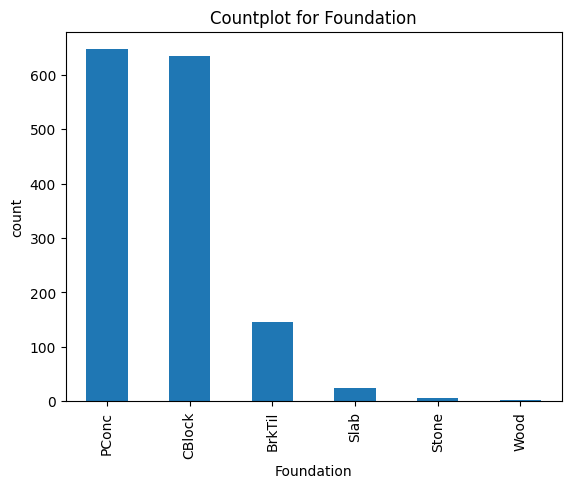

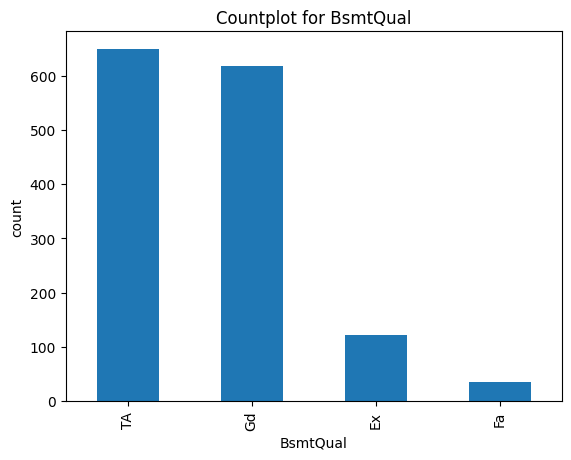

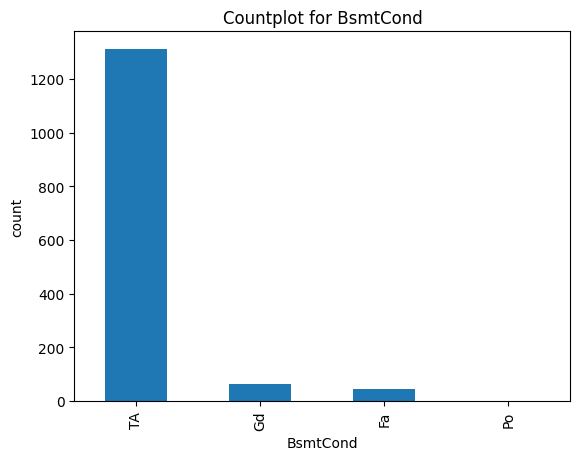

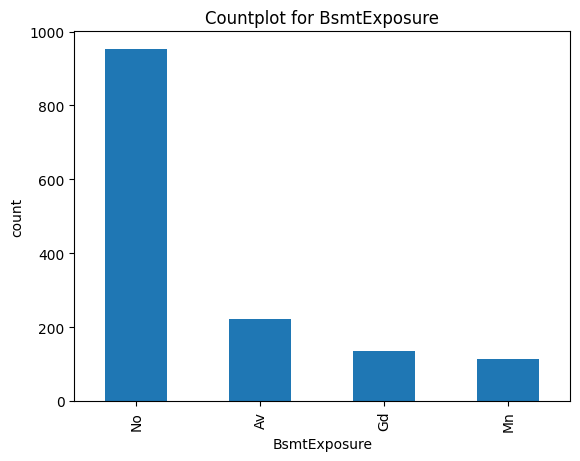

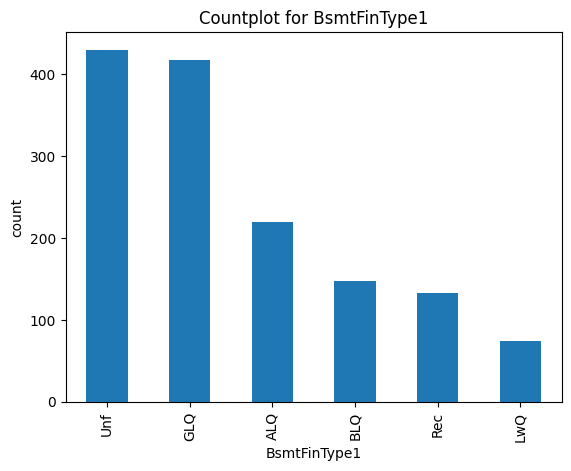

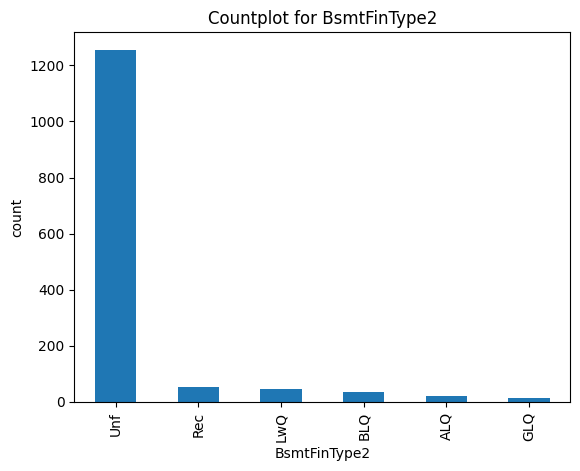

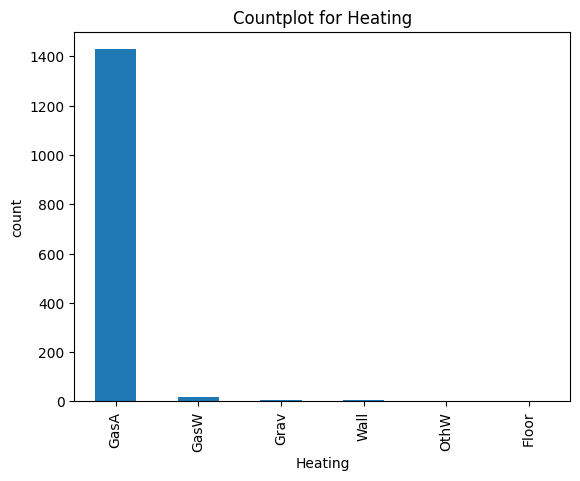

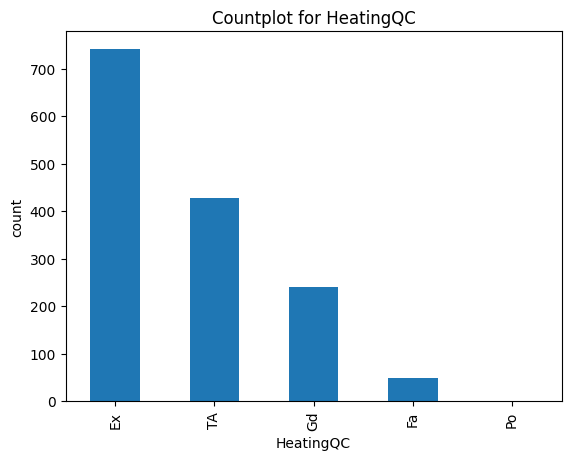

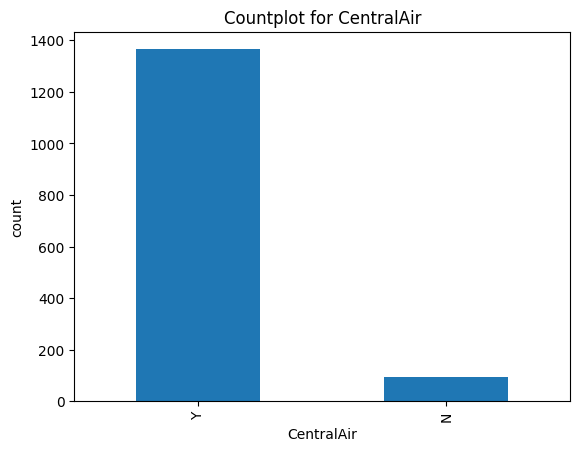

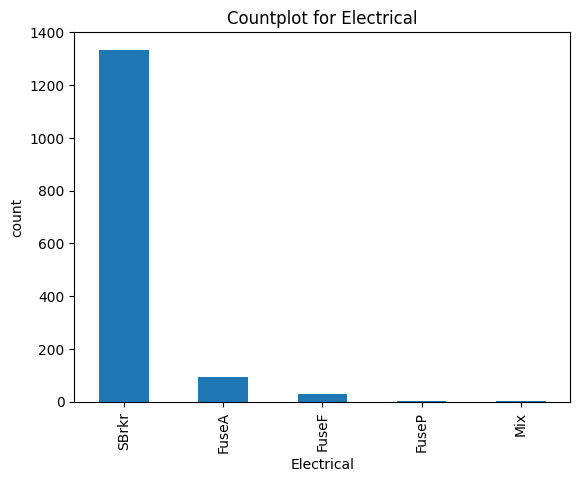

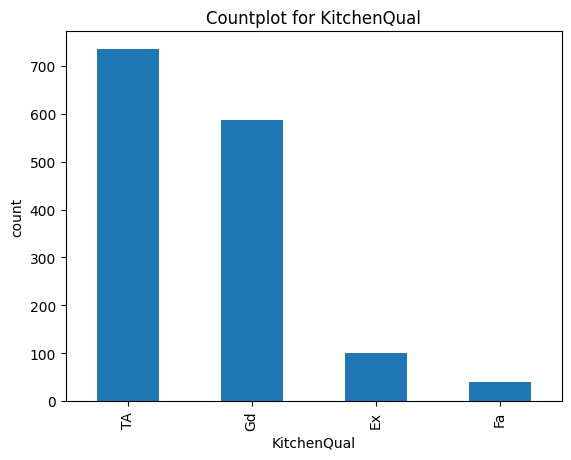

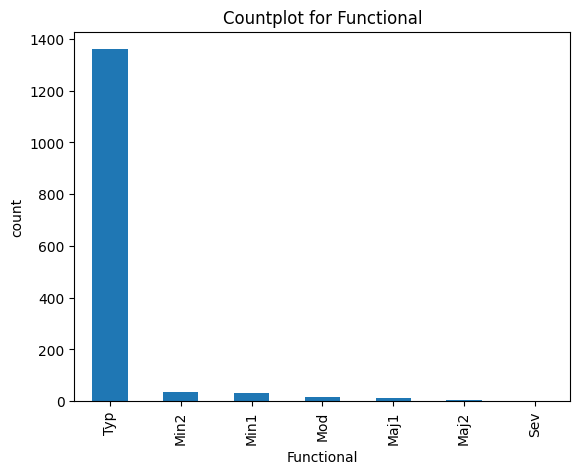

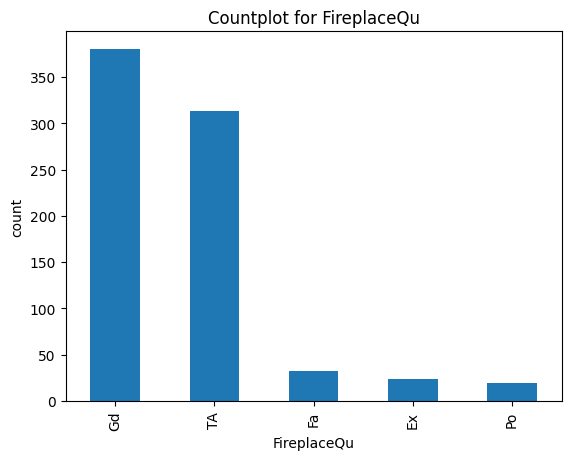

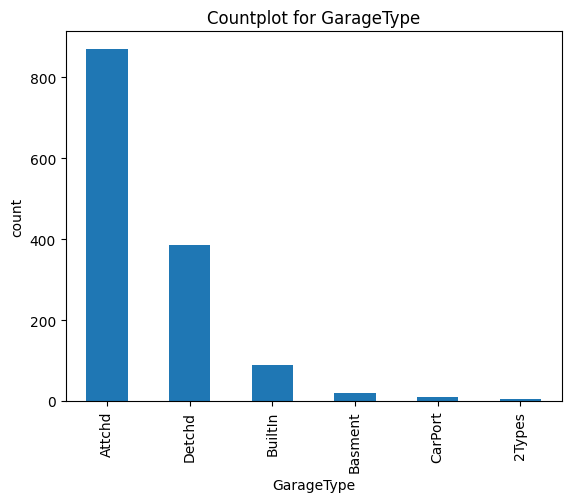

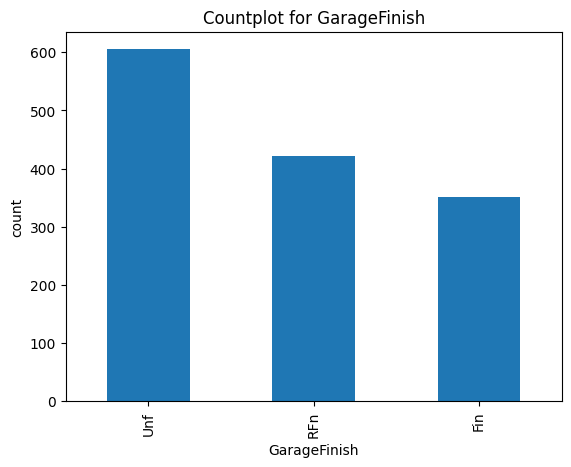

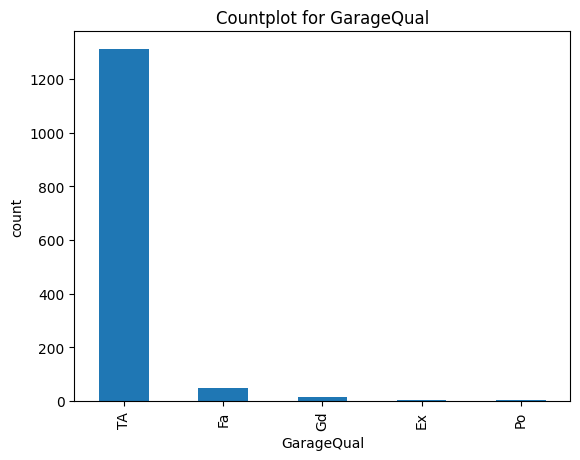

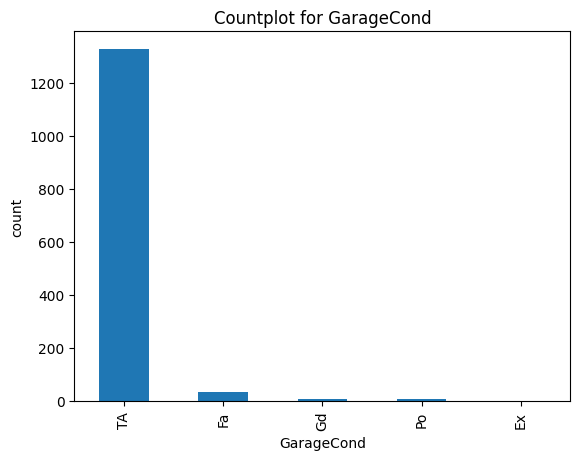

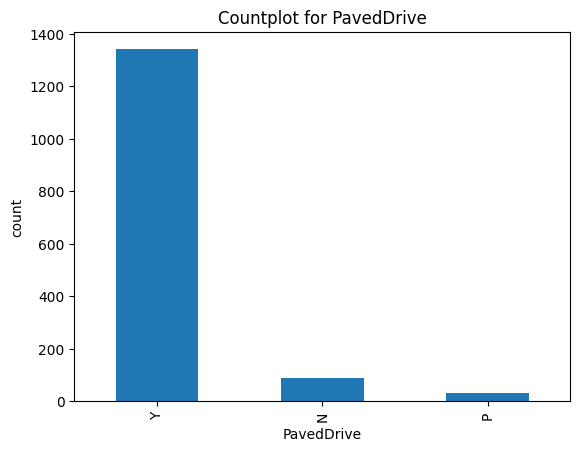

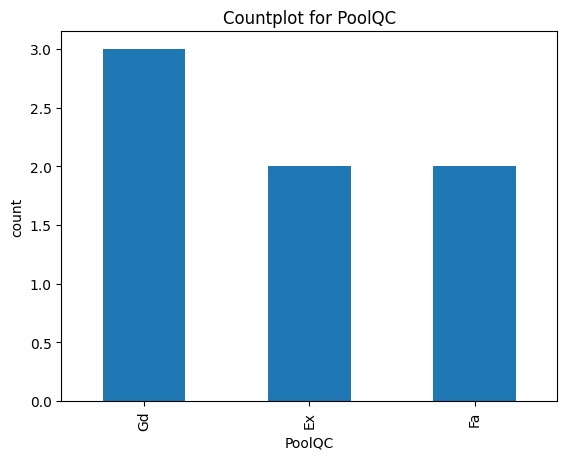

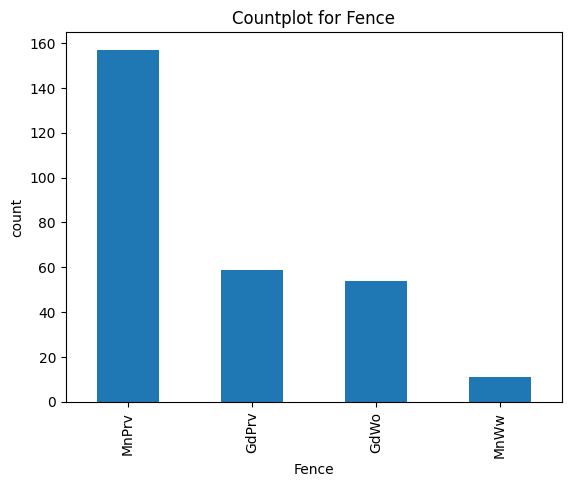

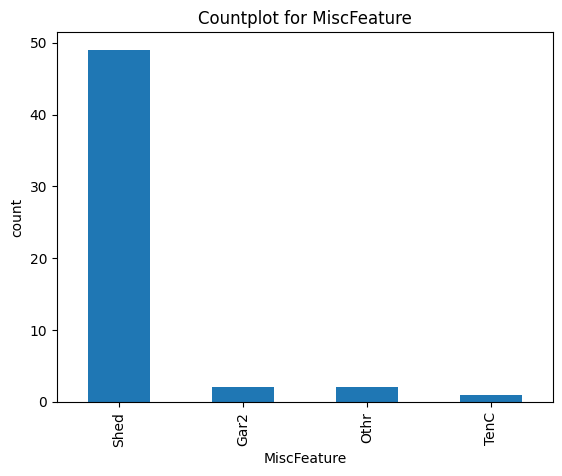

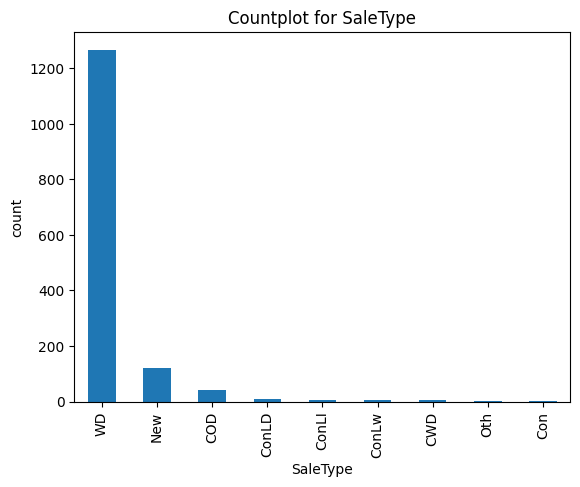

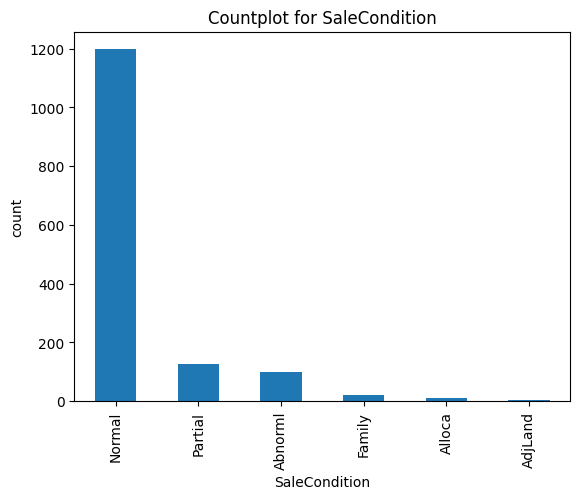

In [50]:
for i in cat:
    df[i].value_counts().plot(kind='bar',title=f'Countplot for {i}',xlabel=str(i),ylabel='count')
    plt.show()

In [51]:
df[con].corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

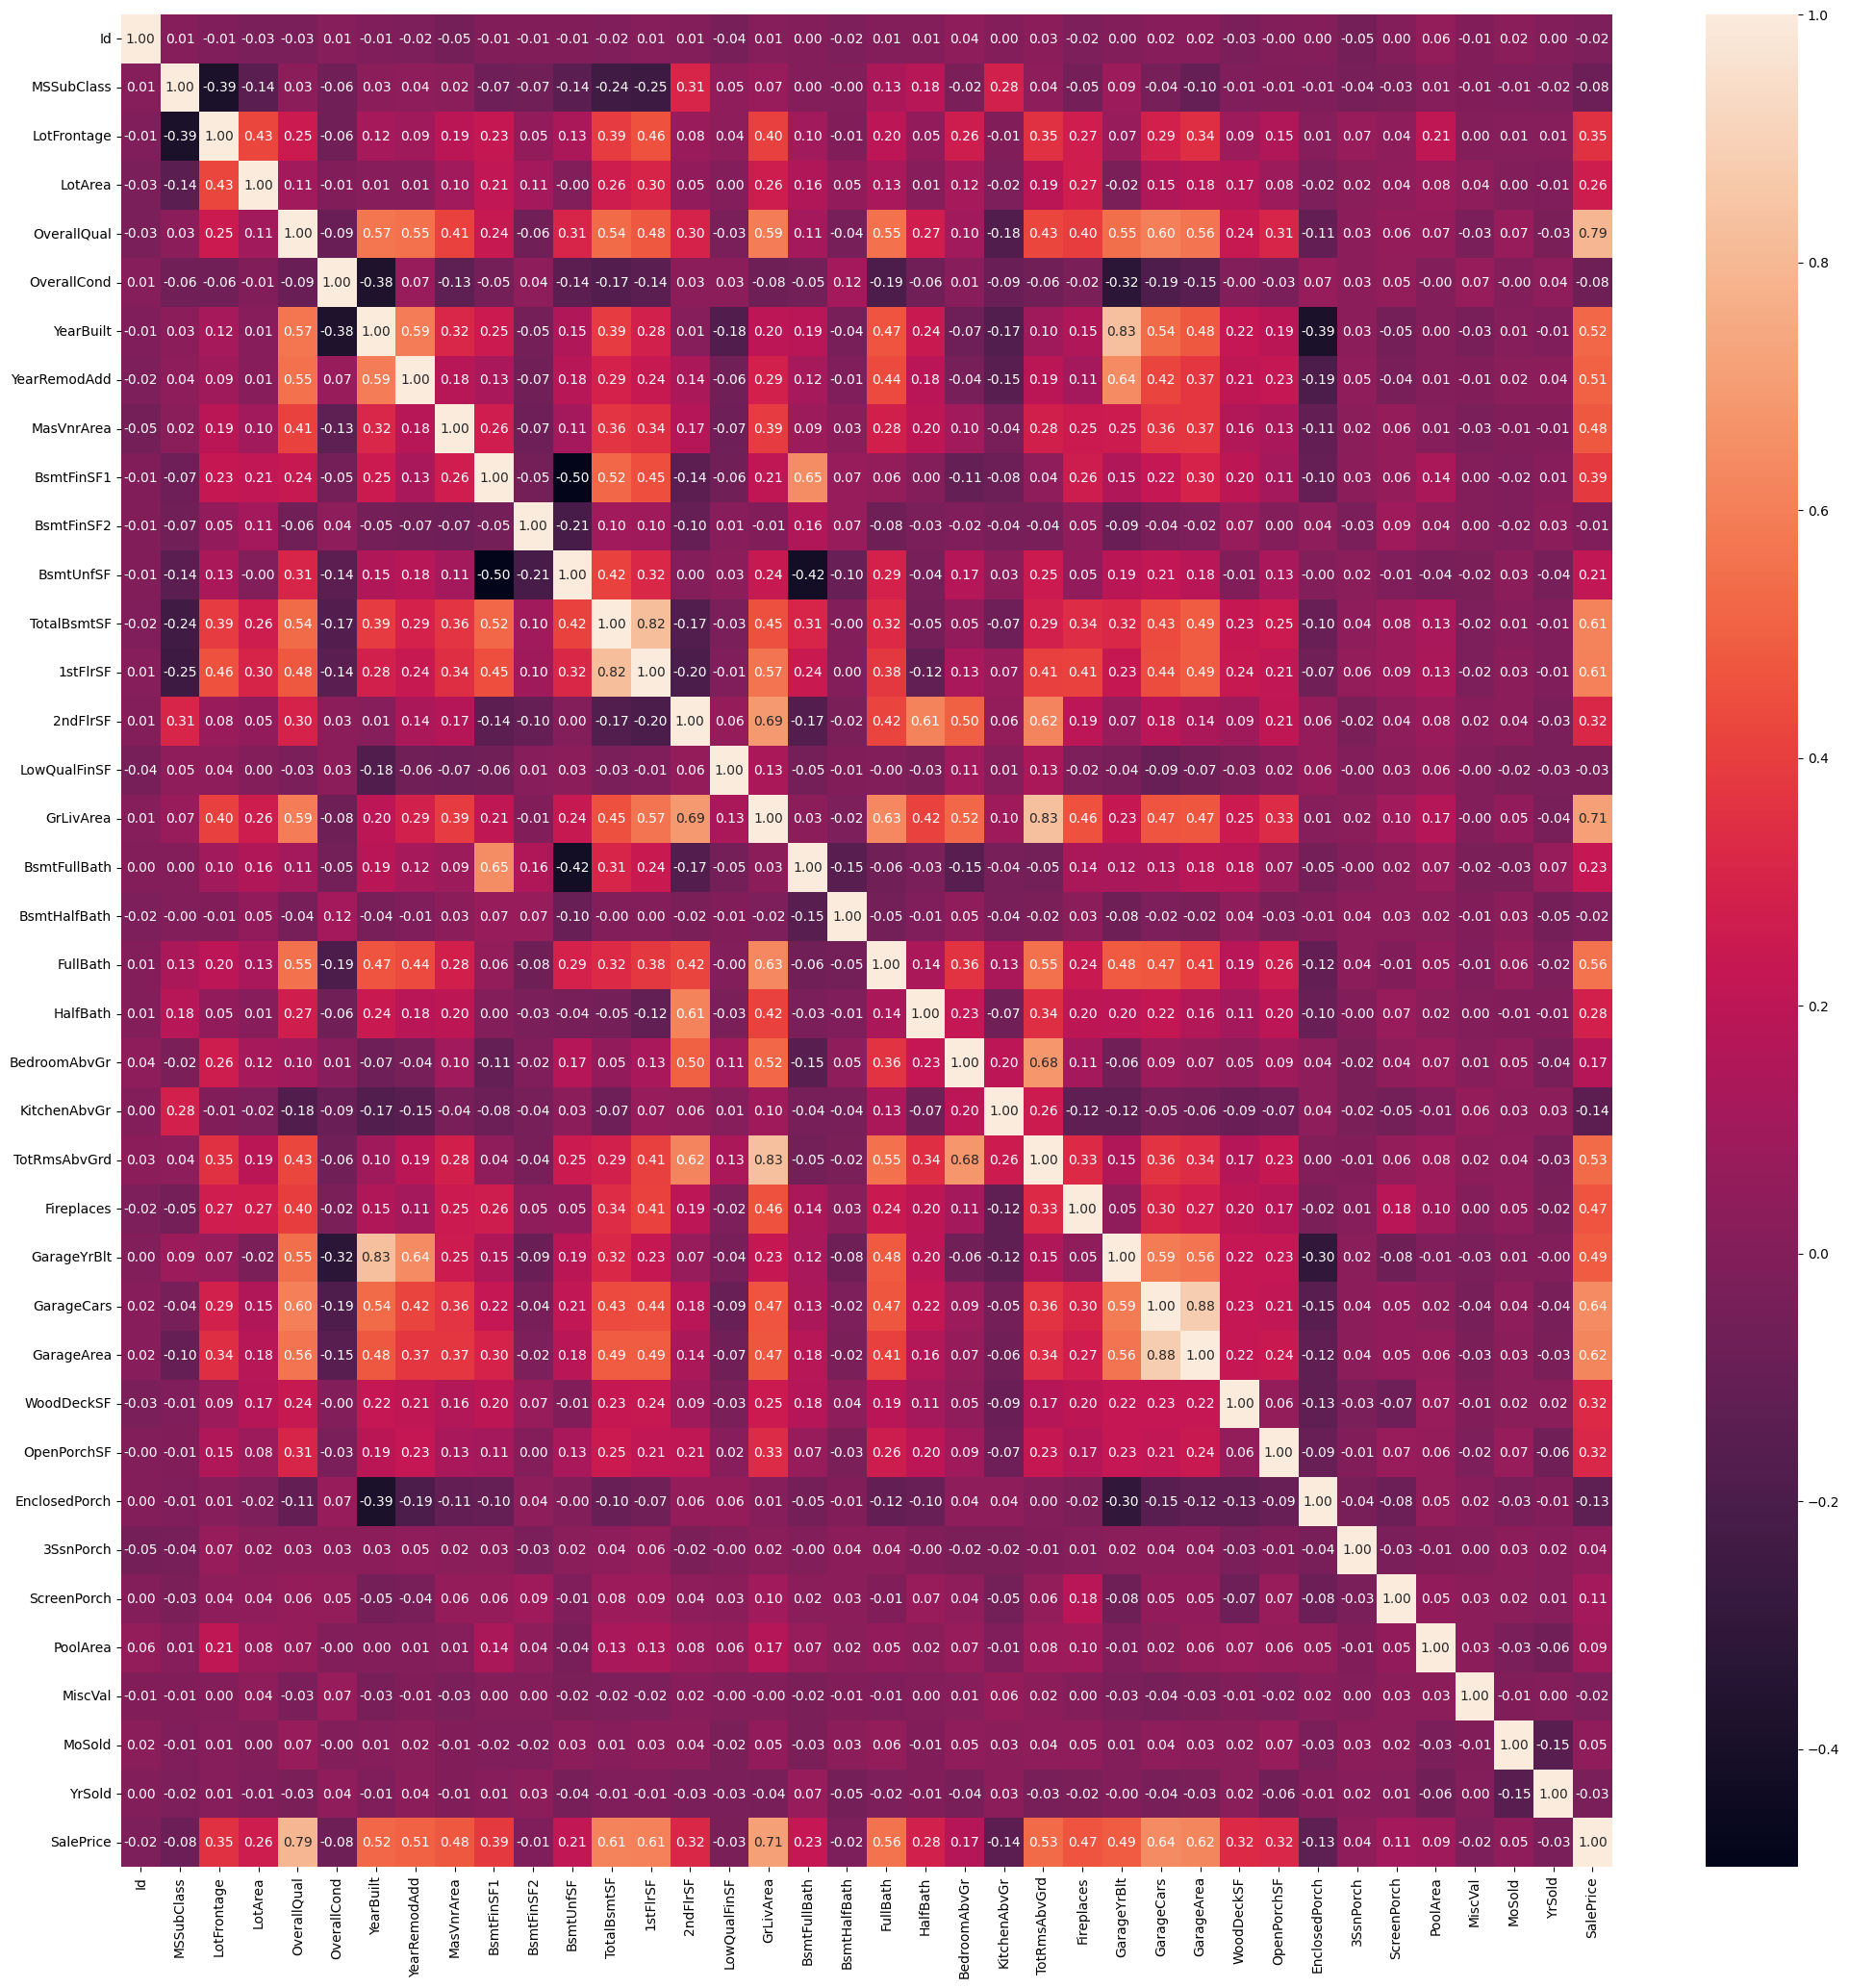

In [52]:
plt.figure(figsize=(25,25))
sns.heatmap(df[con].corr(),annot=True,fmt='.2f')
plt.show()

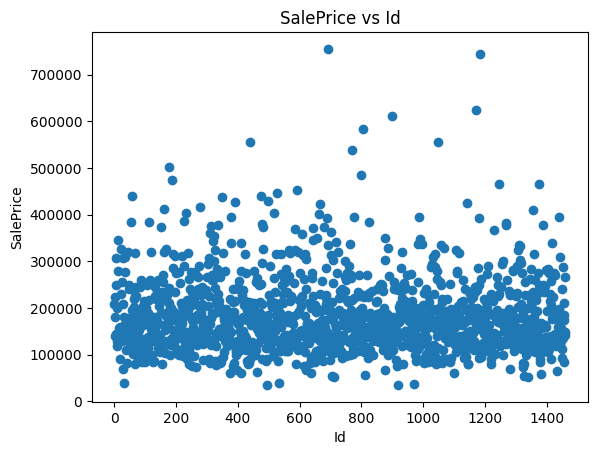

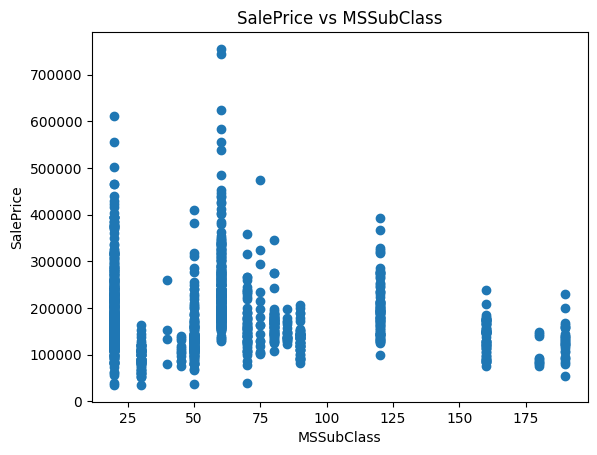

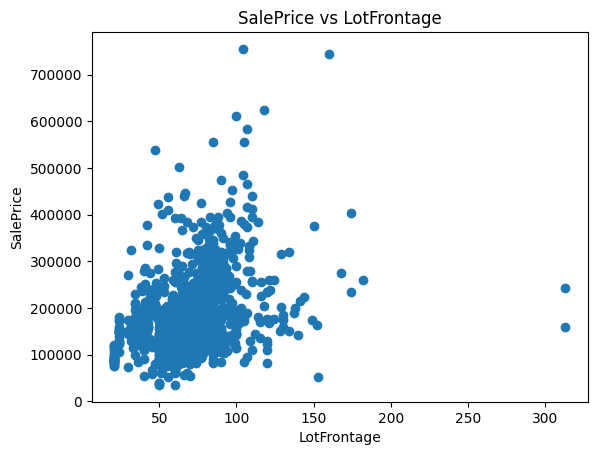

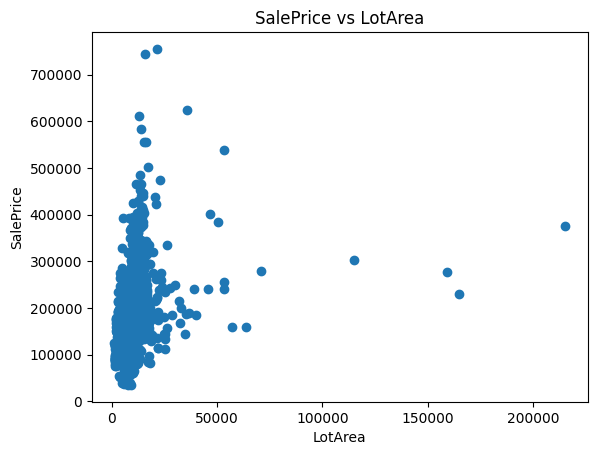

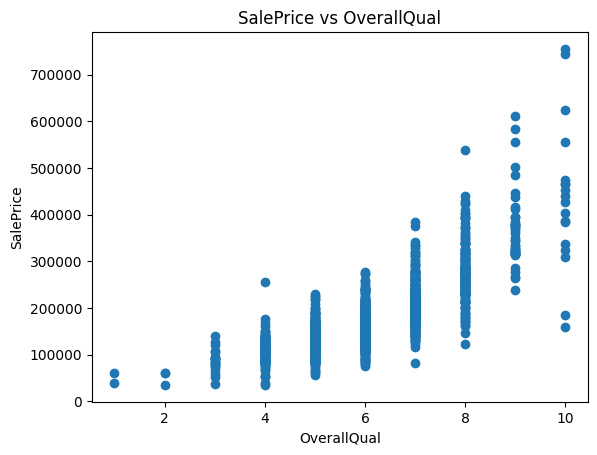

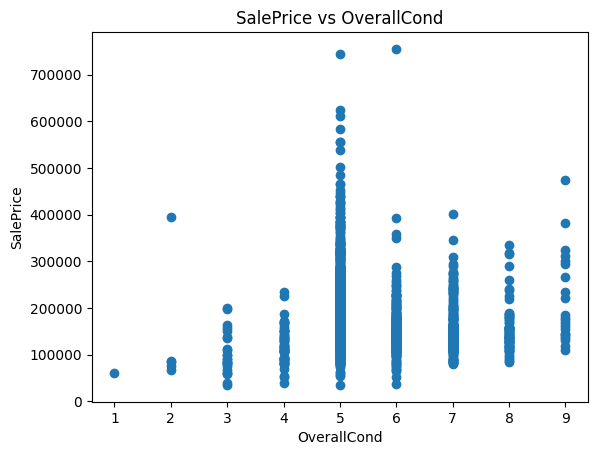

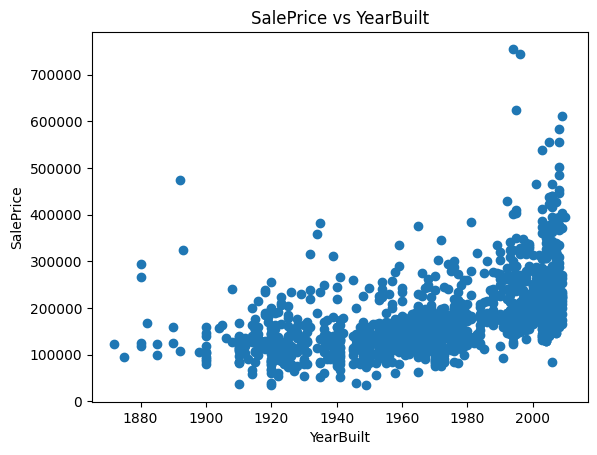

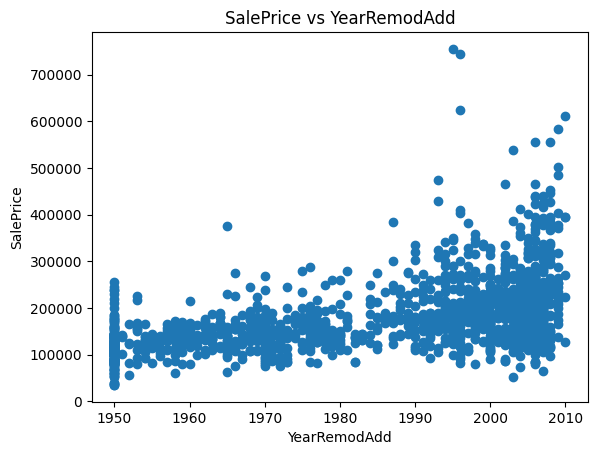

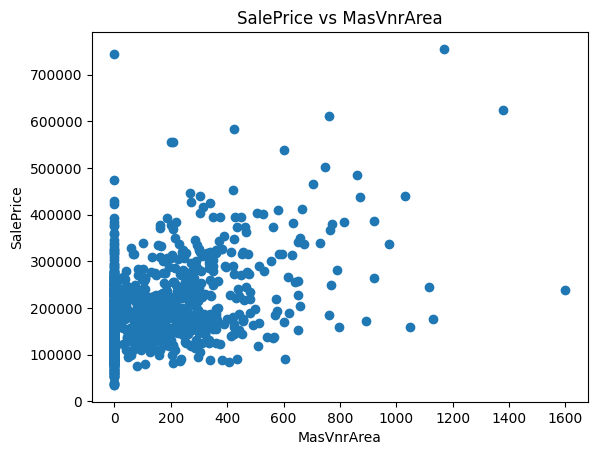

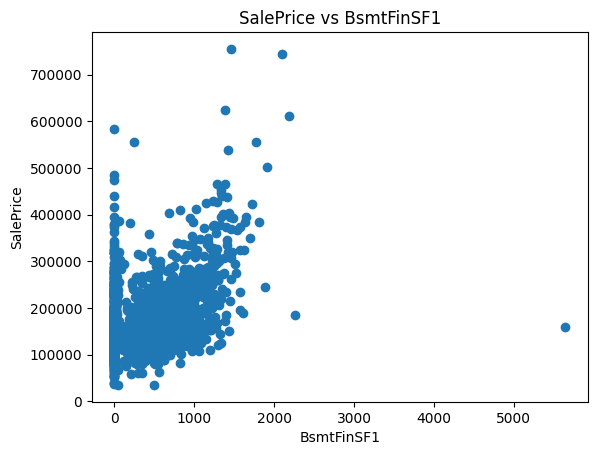

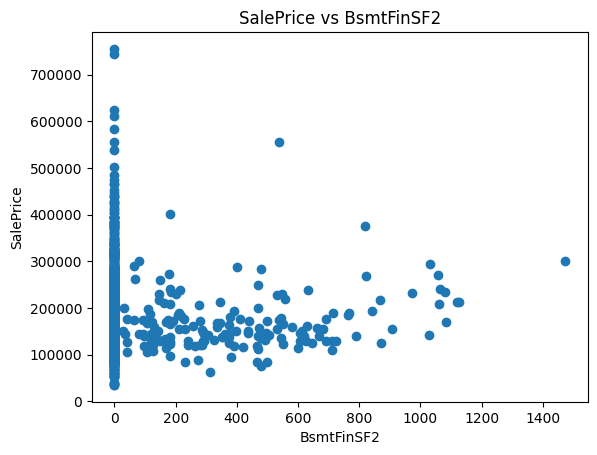

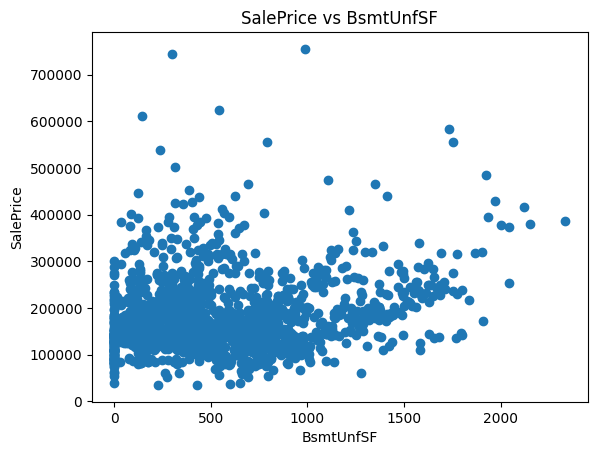

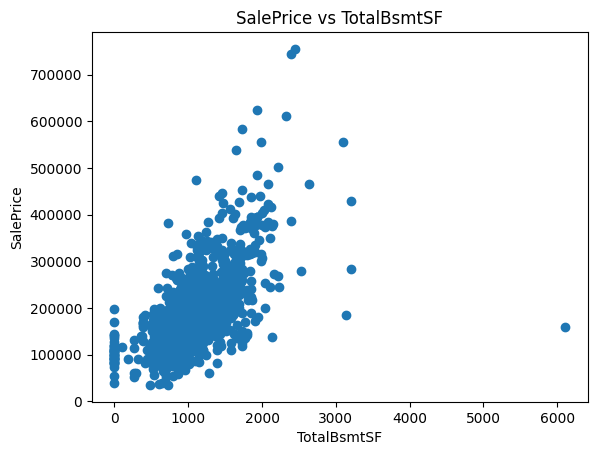

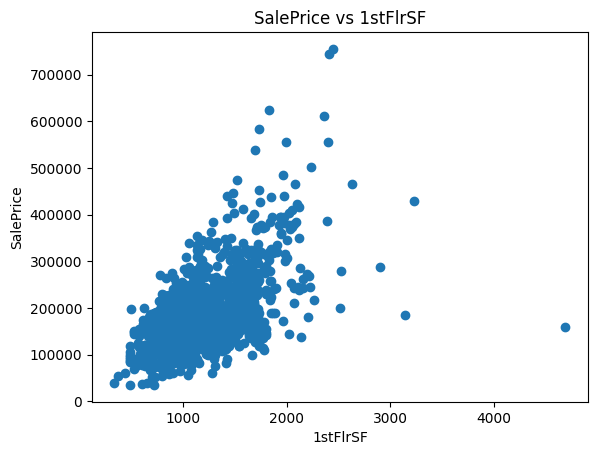

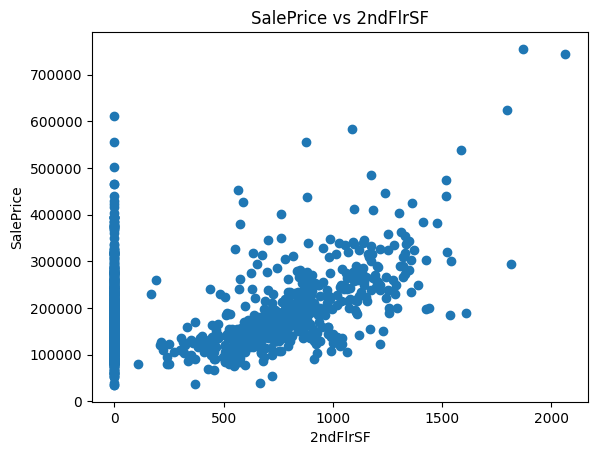

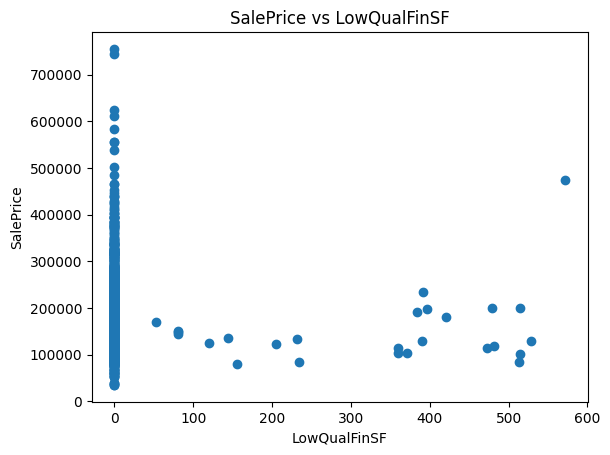

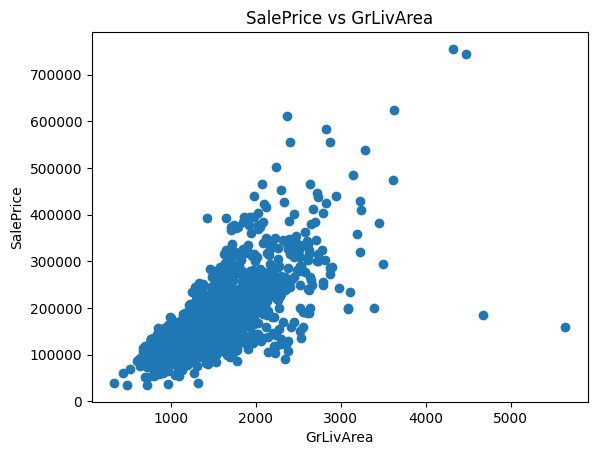

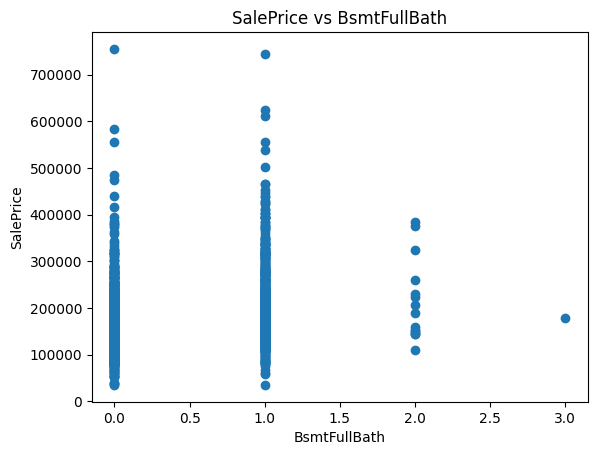

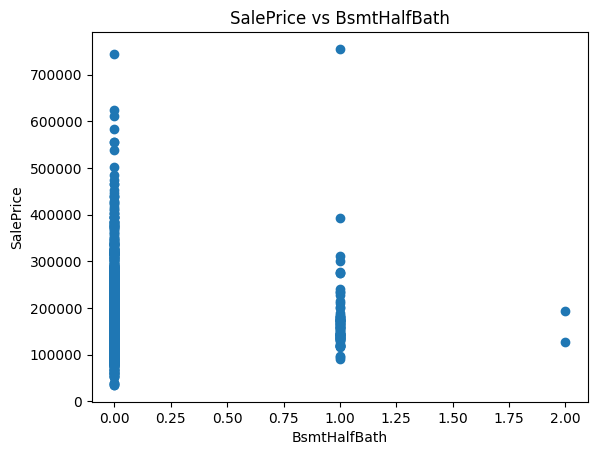

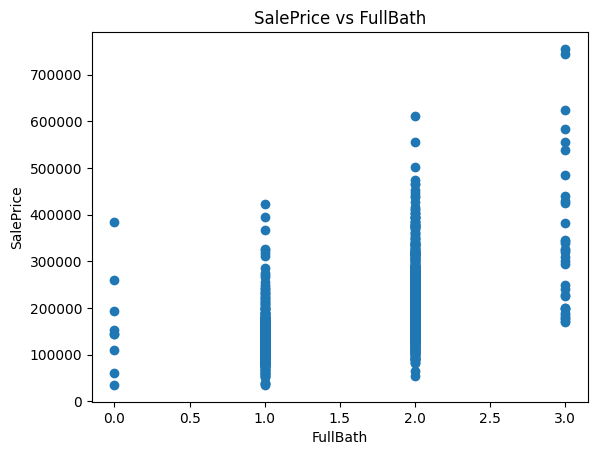

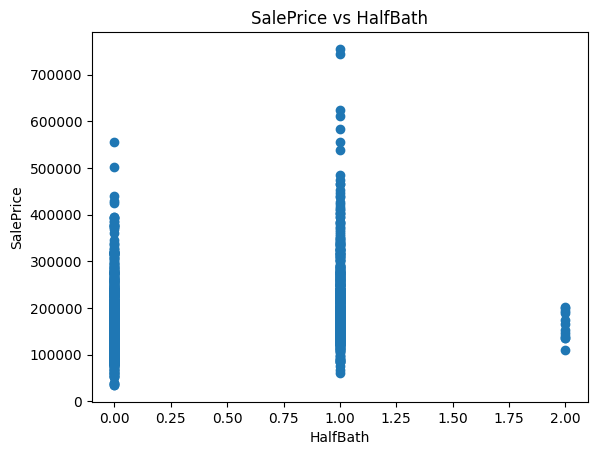

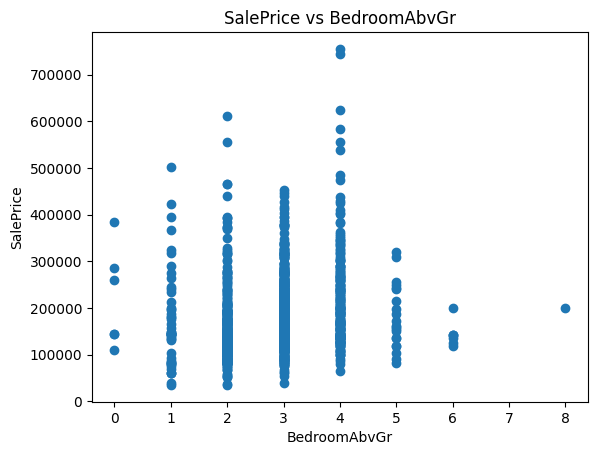

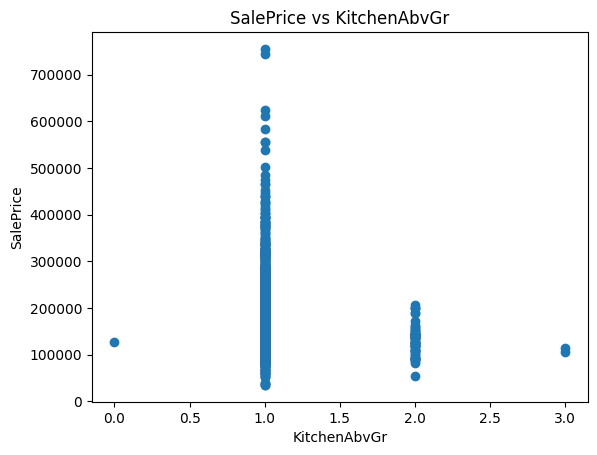

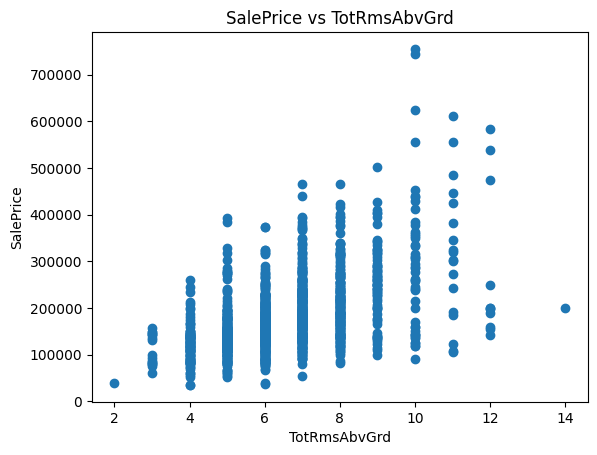

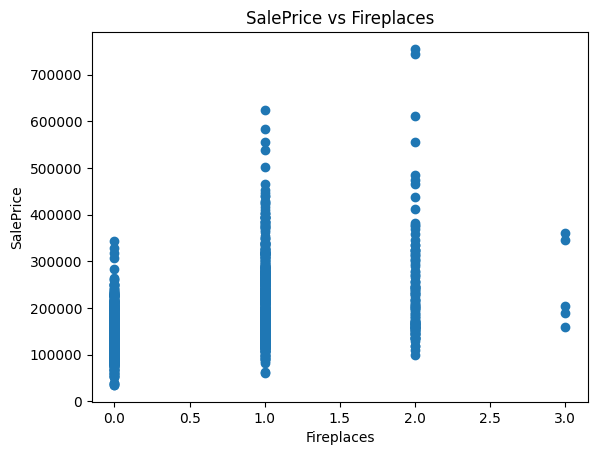

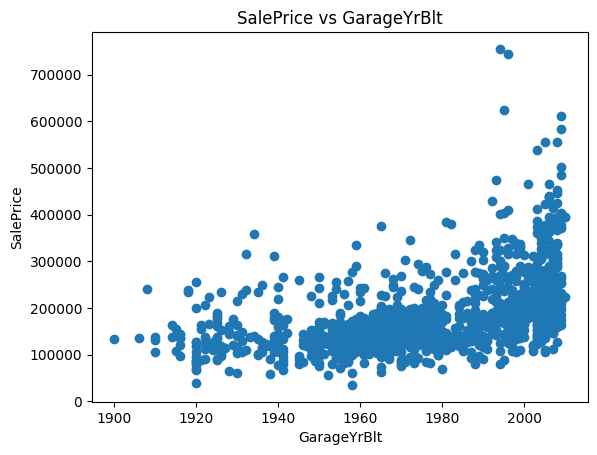

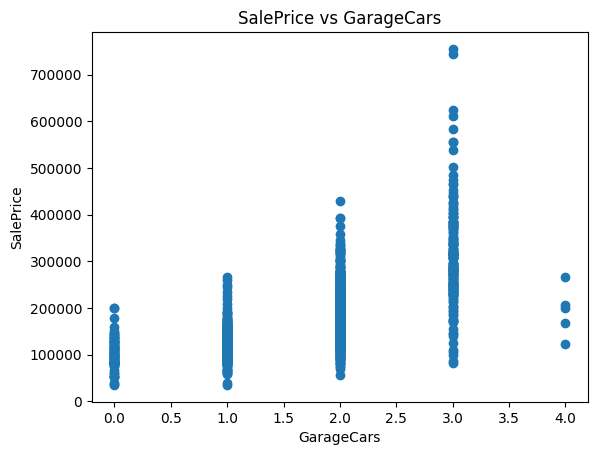

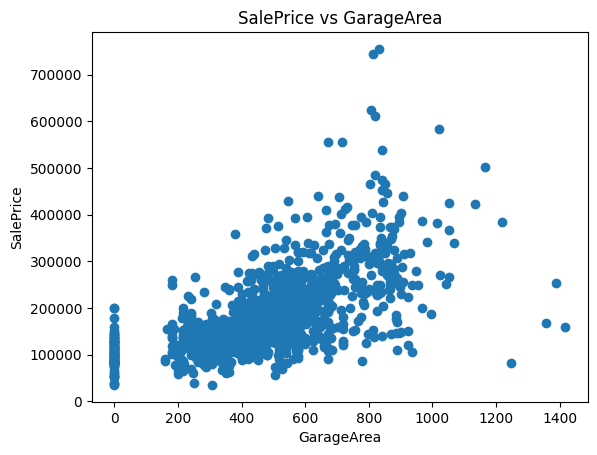

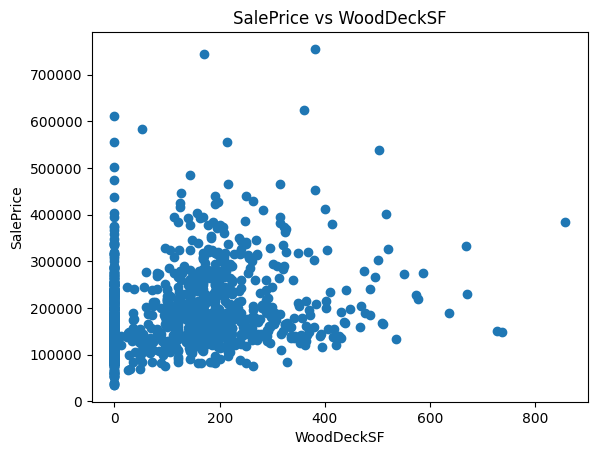

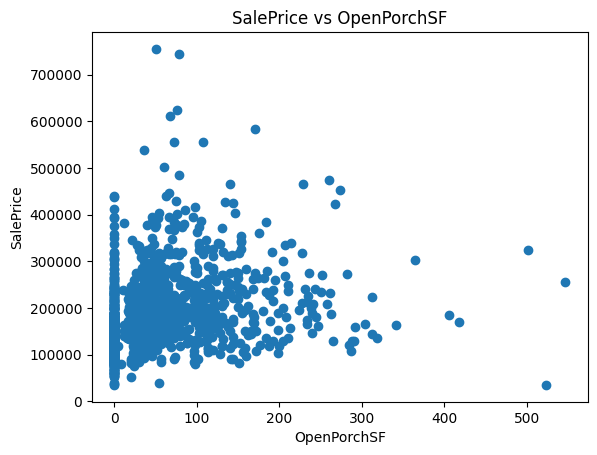

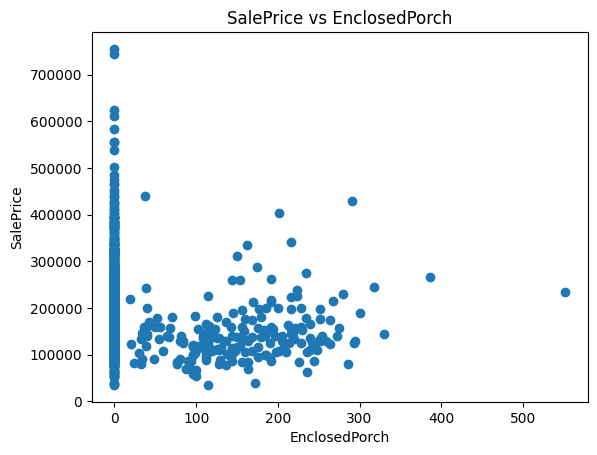

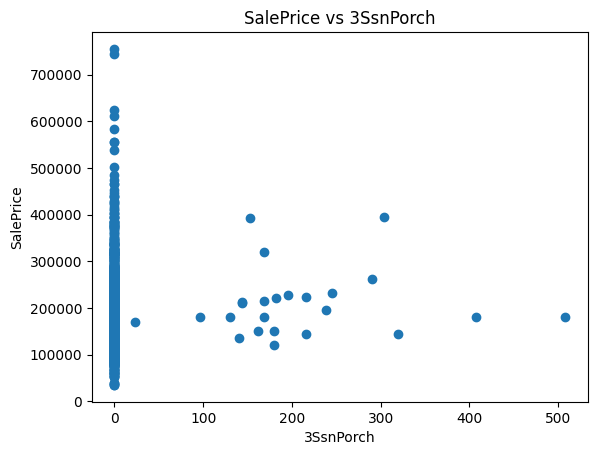

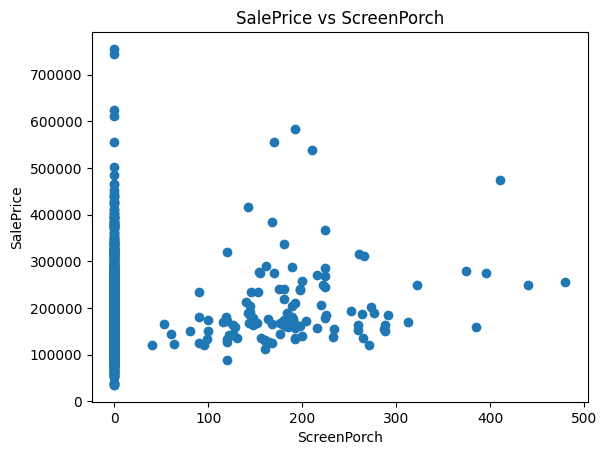

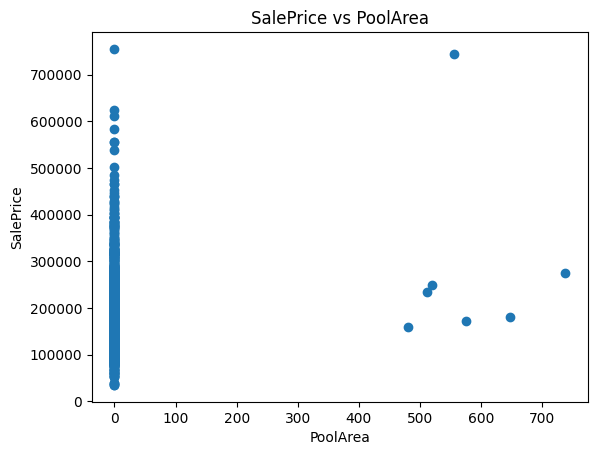

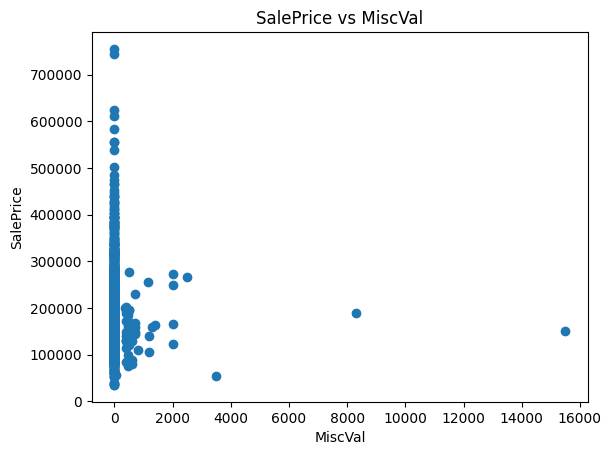

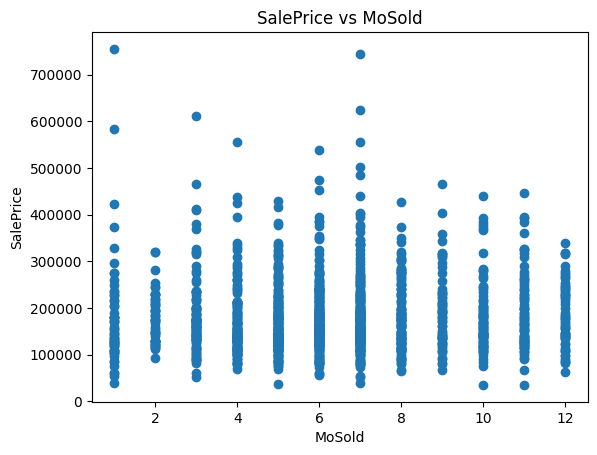

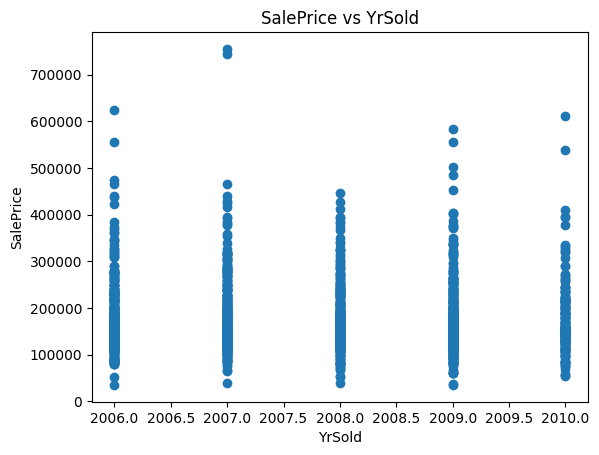

In [53]:
for i in con:
    if i!='SalePrice':
        plt.scatter(df[i],df['SalePrice'])
        plt.xlabel(f'{i}')
        plt.ylabel('SalePrice')
        plt.title(f'SalePrice vs {i}')
        plt.show()

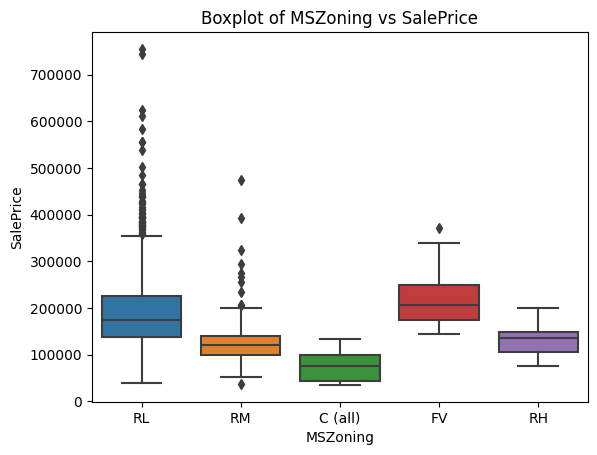

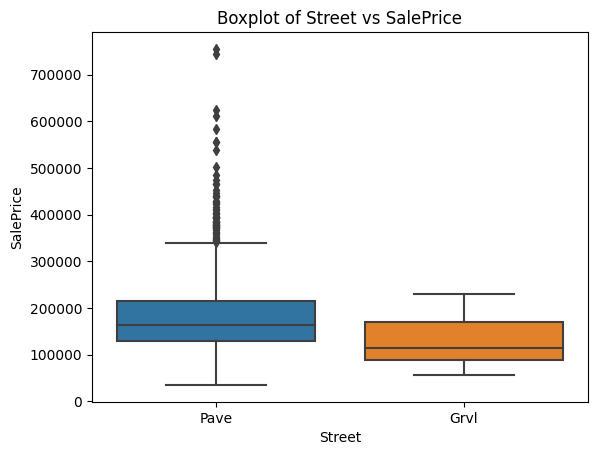

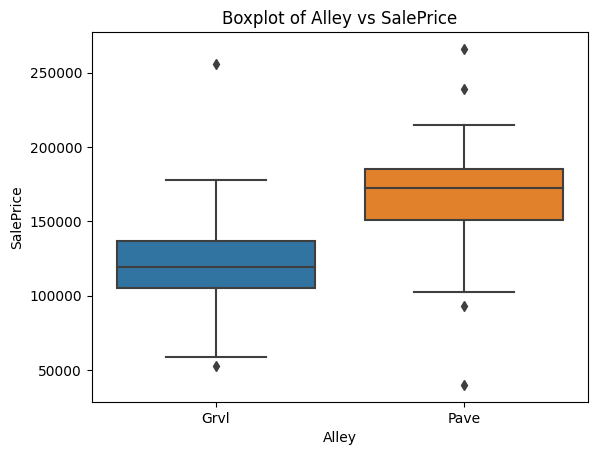

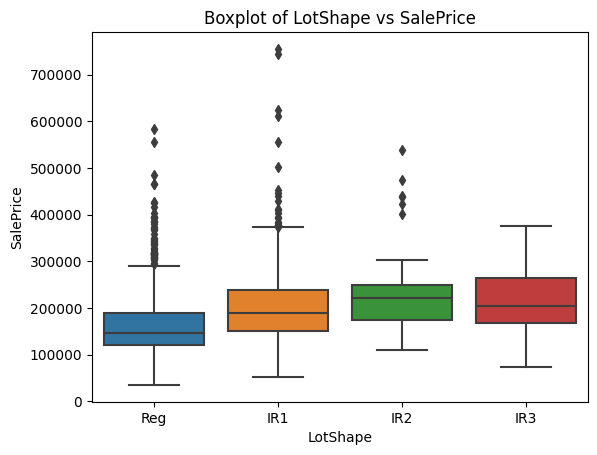

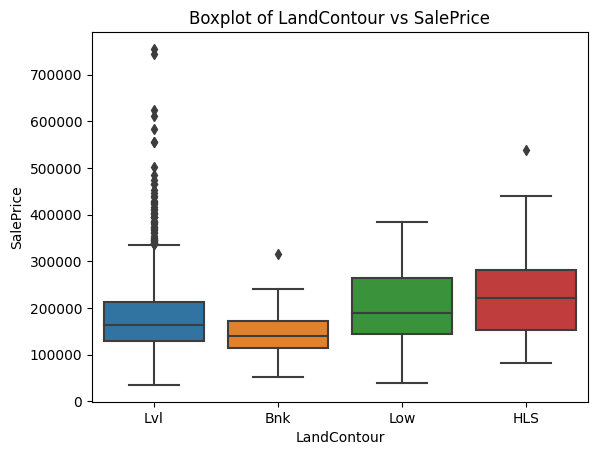

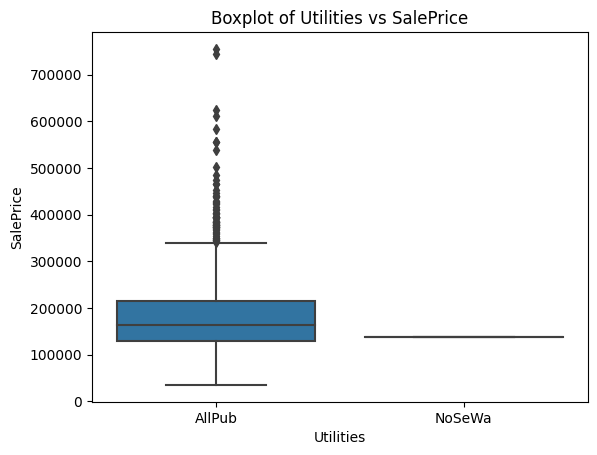

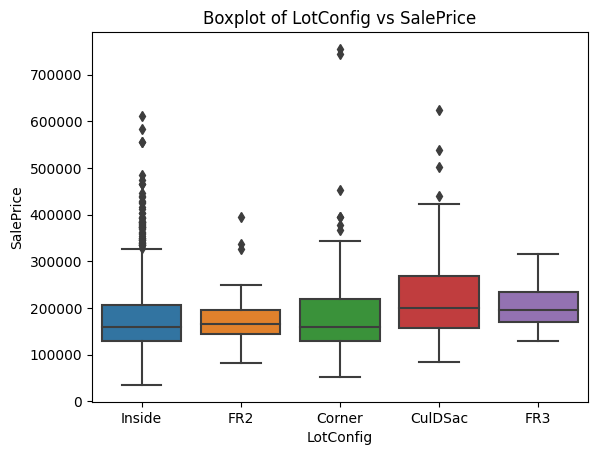

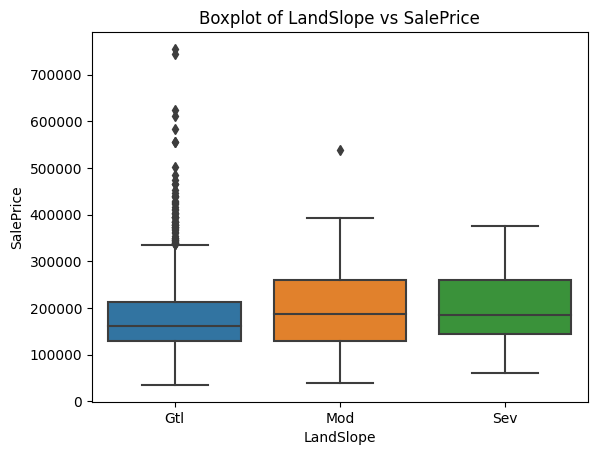

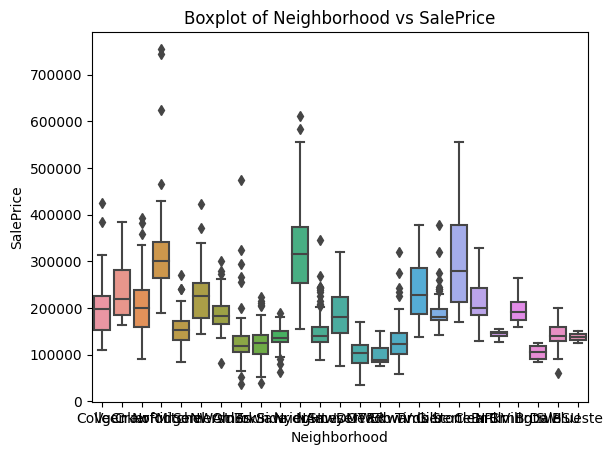

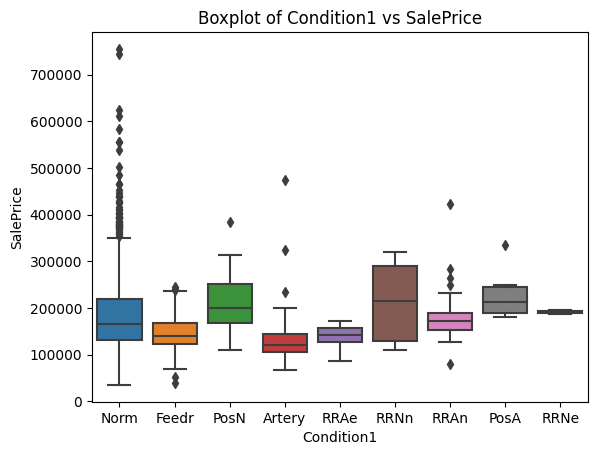

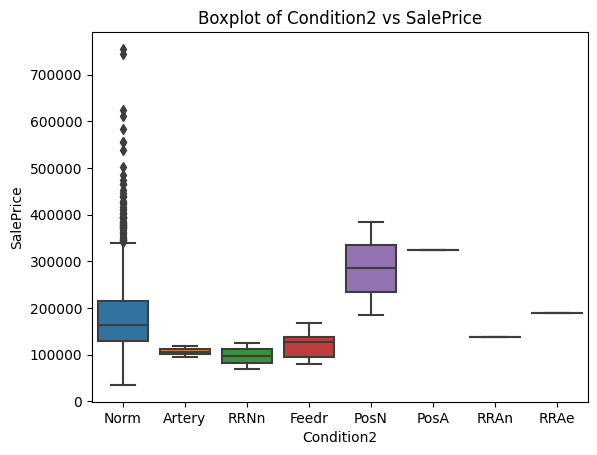

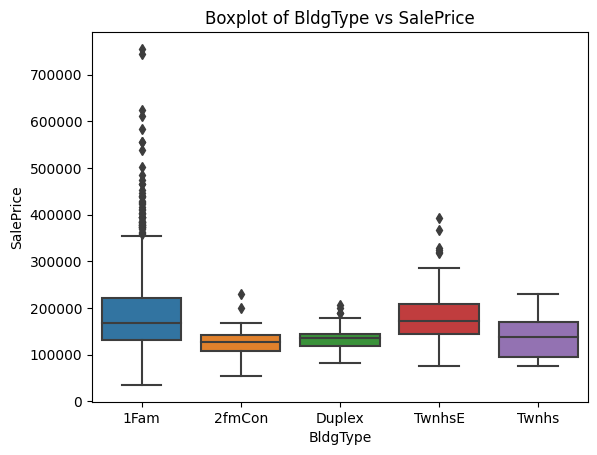

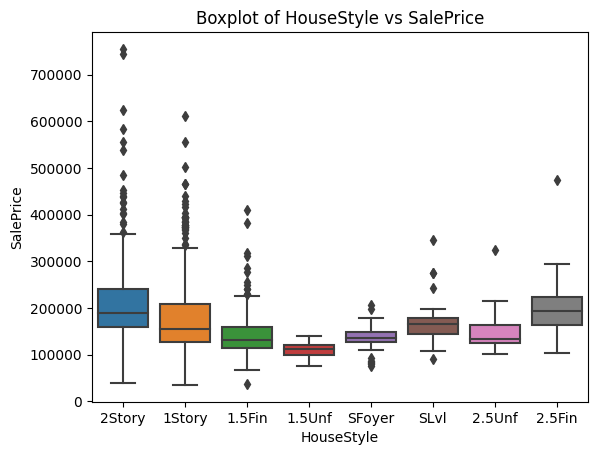

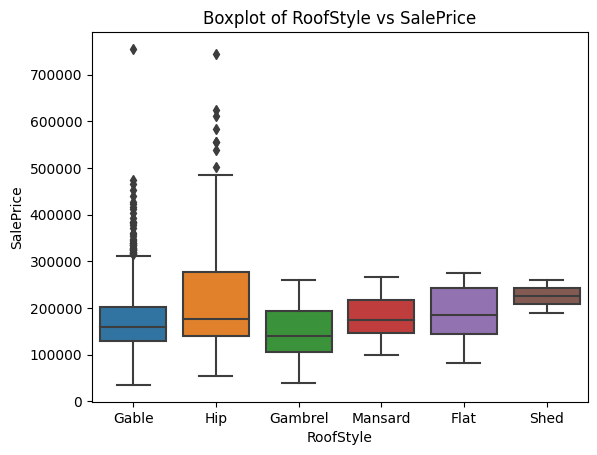

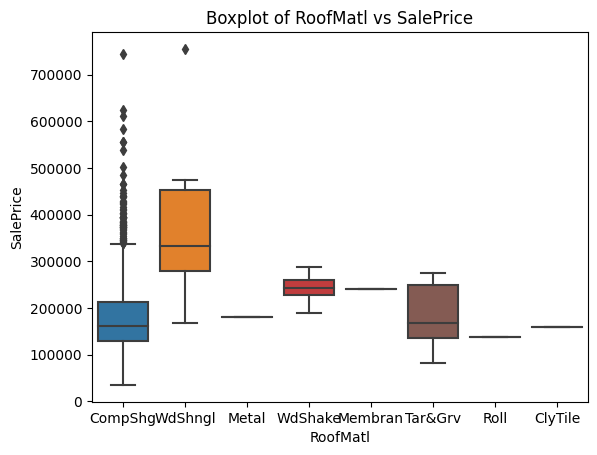

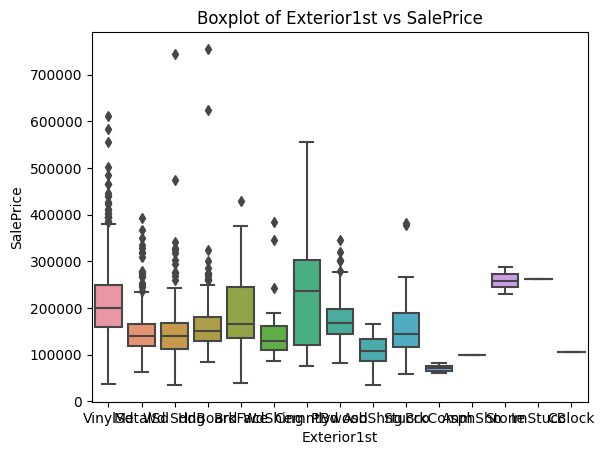

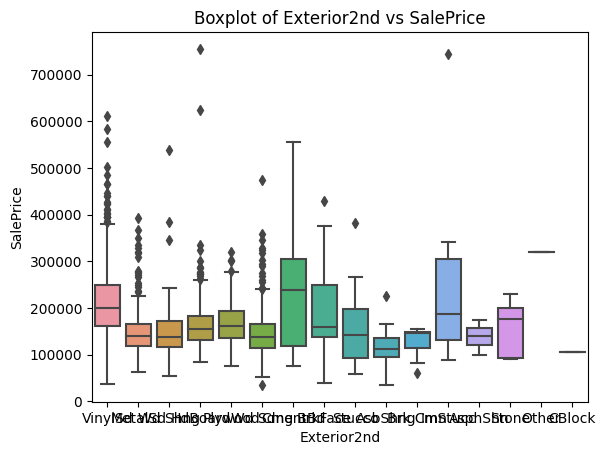

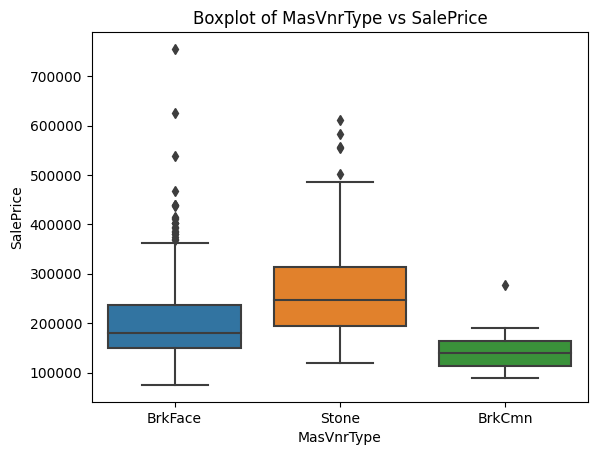

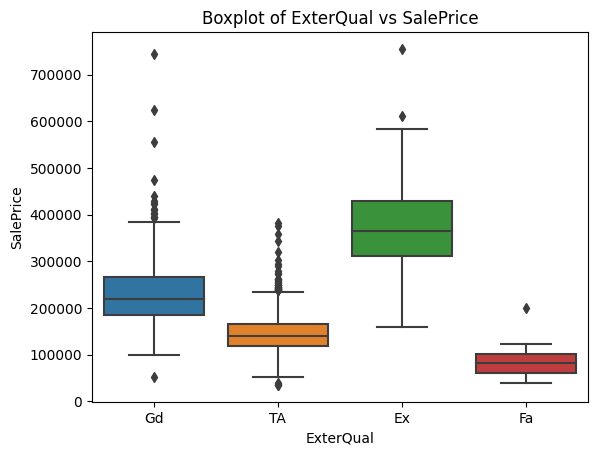

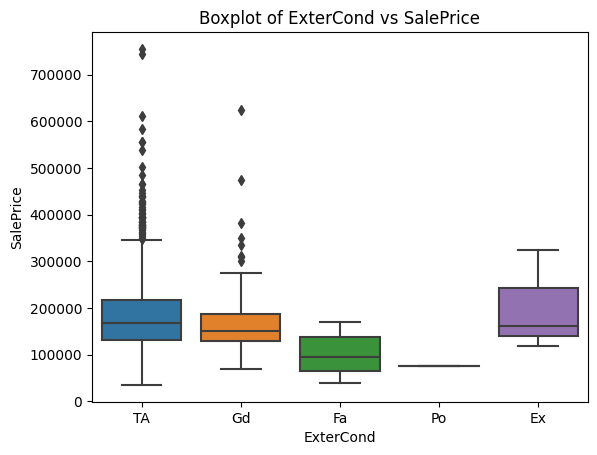

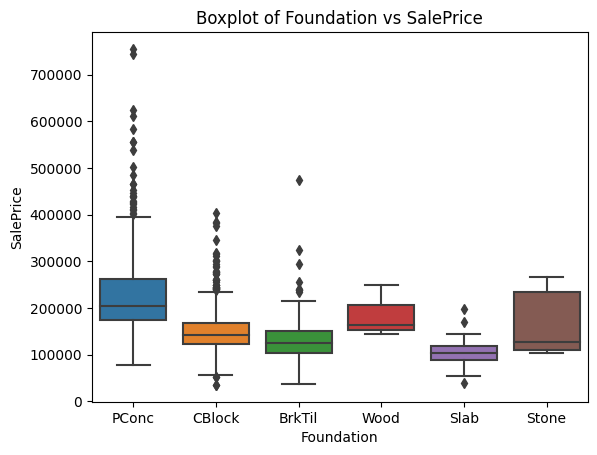

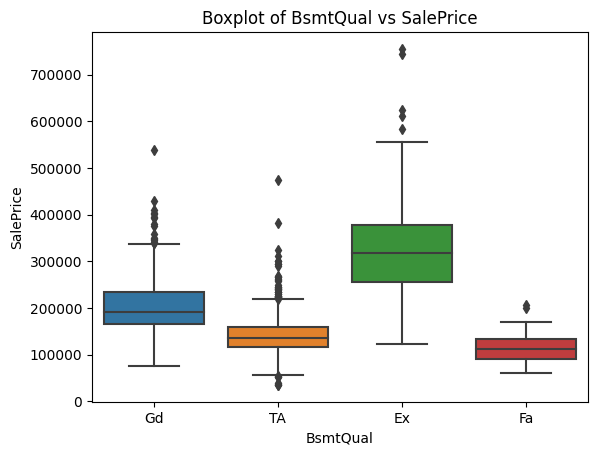

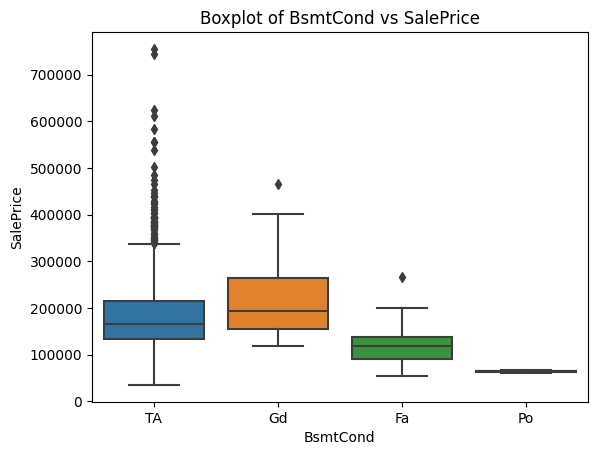

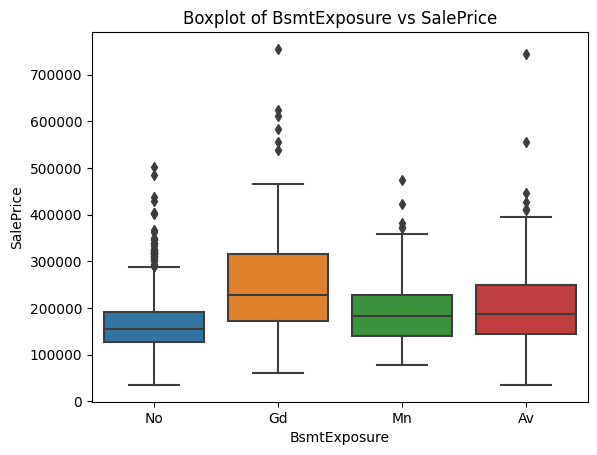

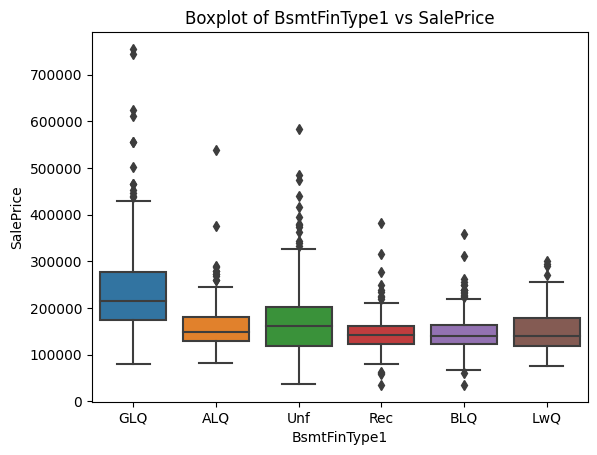

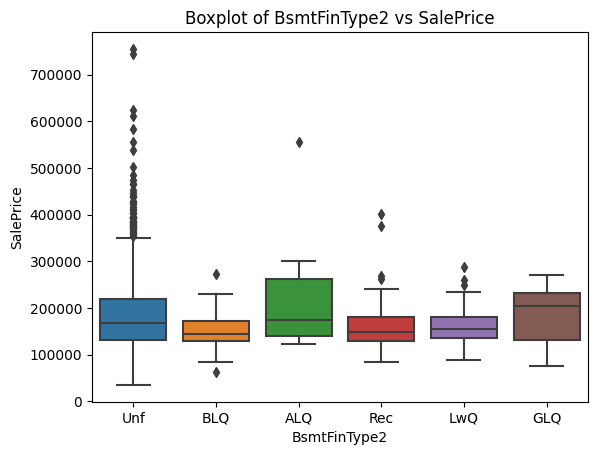

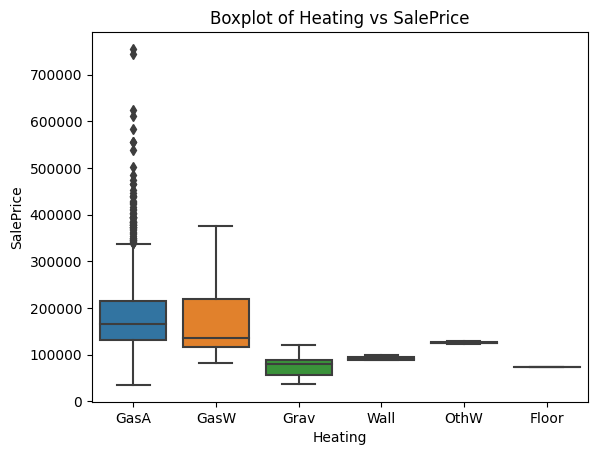

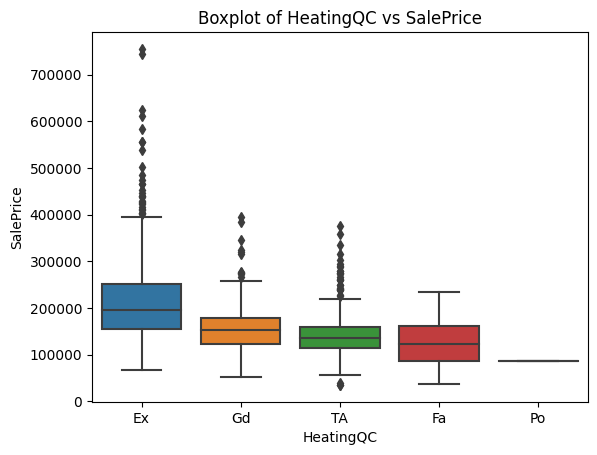

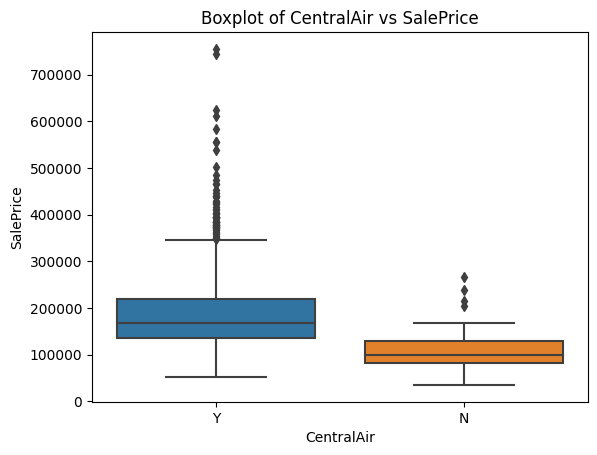

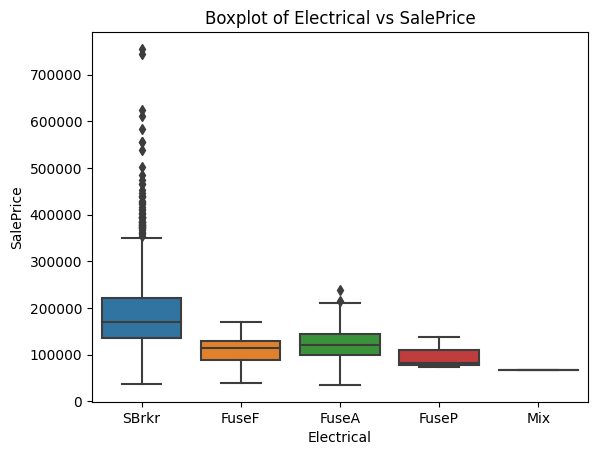

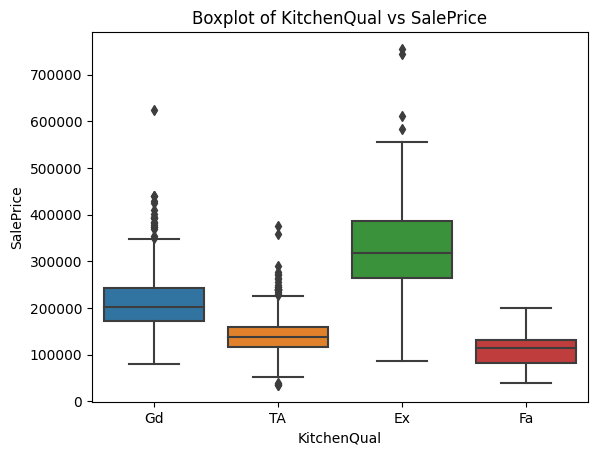

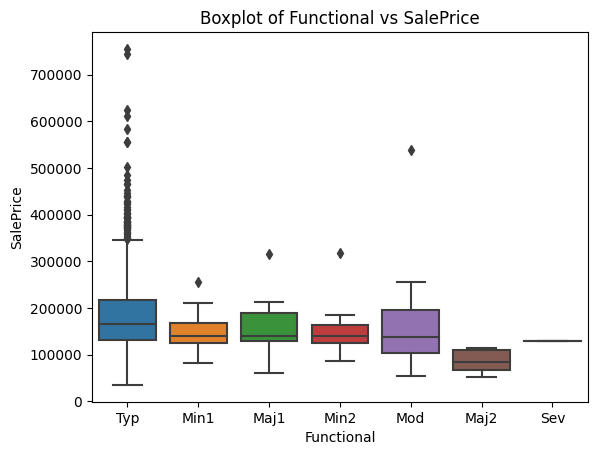

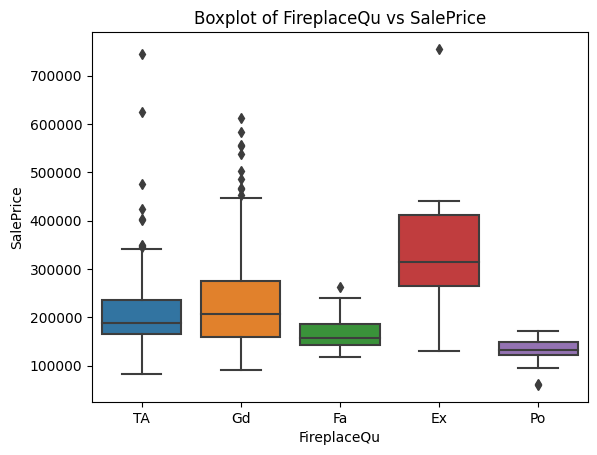

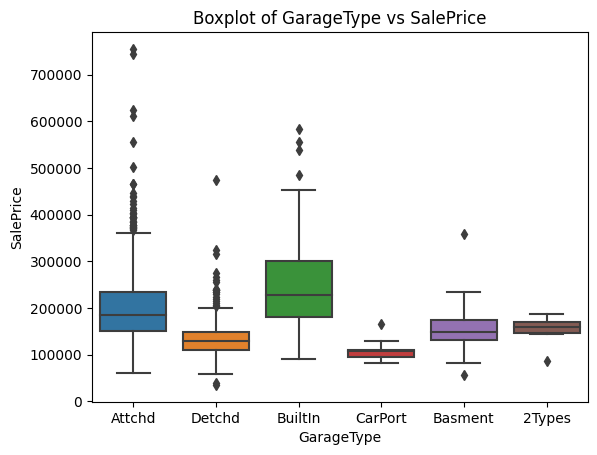

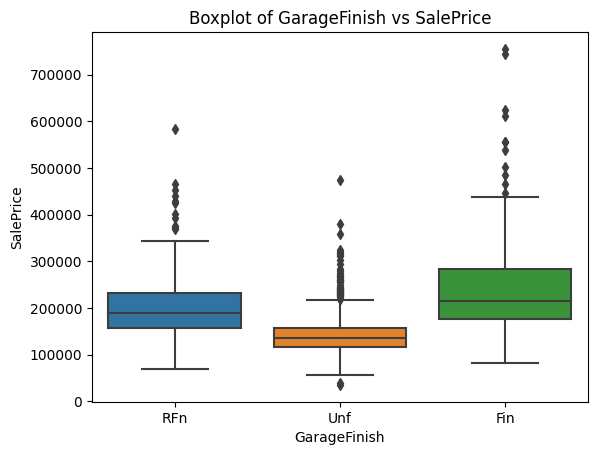

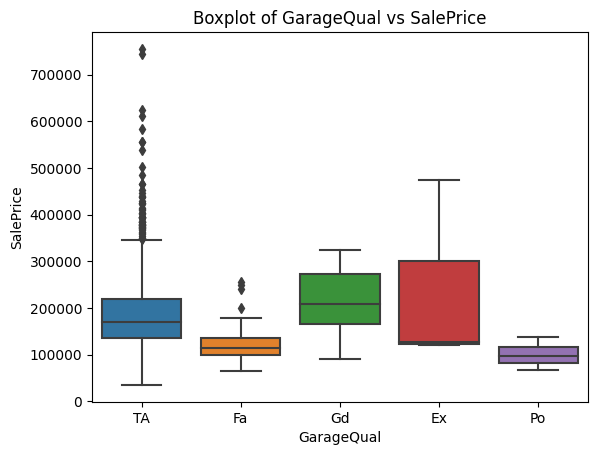

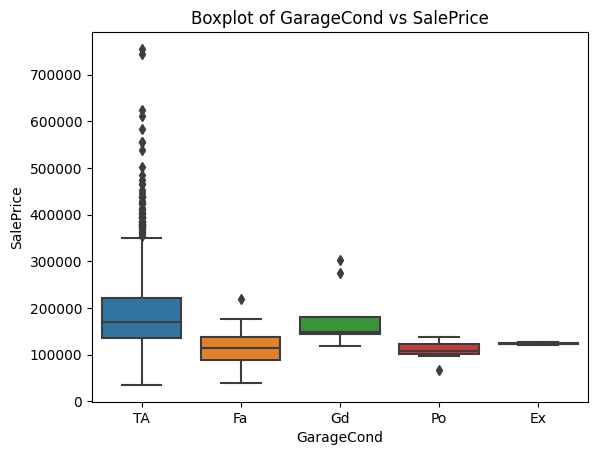

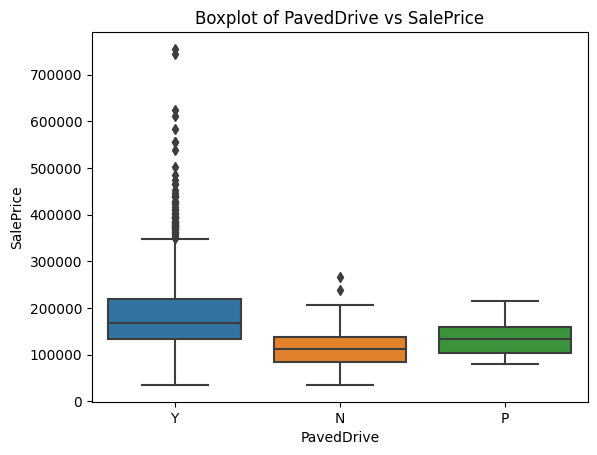

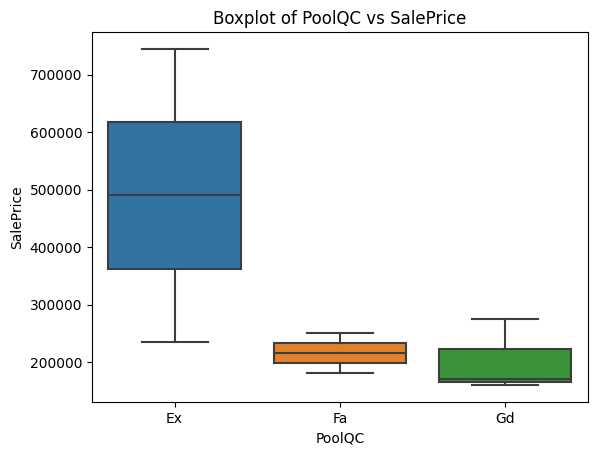

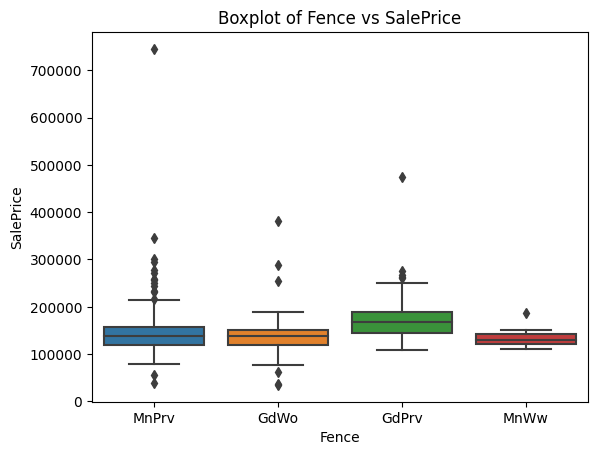

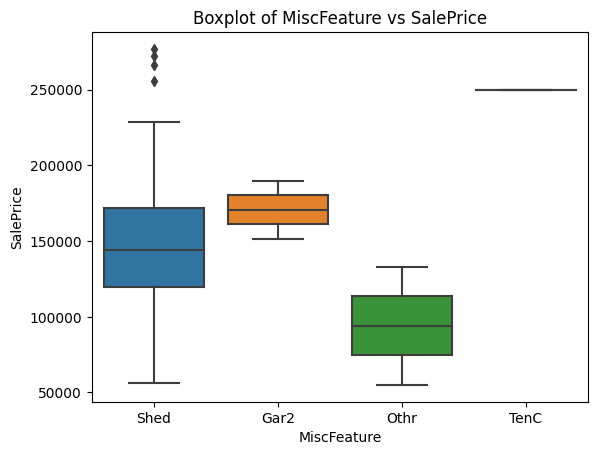

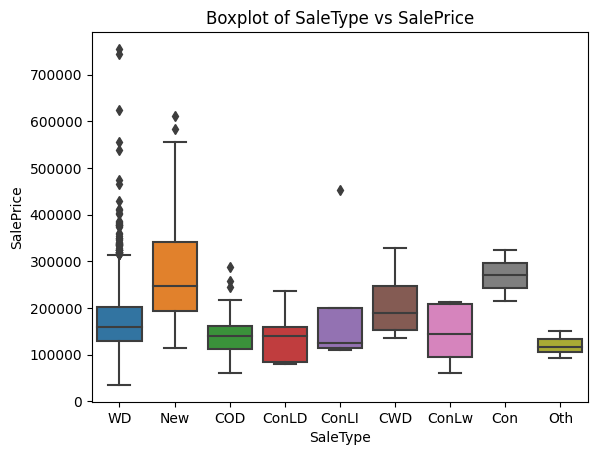

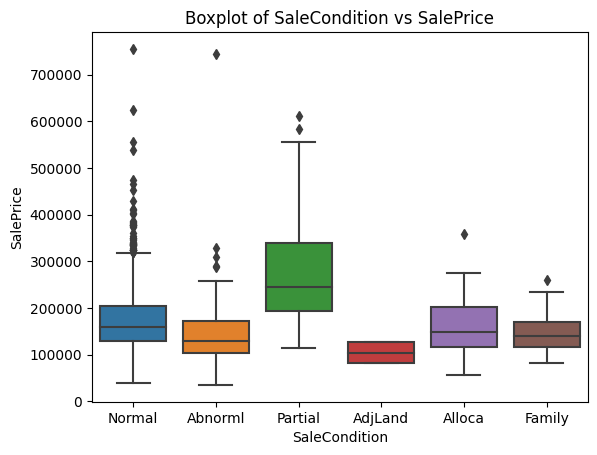

In [54]:
for i in cat:
    sns.boxplot(data=df,x=i,y='SalePrice')
    plt.title(f'Boxplot of {i} vs SalePrice')
    plt.show()

# Seperate X and Y

In [55]:
X = df.drop(labels=['Id','SalePrice'],axis=1)
Y = df[['SalePrice']]

In [56]:
X.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
1         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
3         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
4         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       2    2008        WD         Normal  
1         NaN       0       5    2007        WD         Normal  
2         NaN       0       9    2008        WD         Normal  
3         NaN       0       2    2006        WD        Abnorml  
4         NaN       0      12    2008        WD         Normal  

[5 rows x 79 columns]

In [57]:
Y.head()

SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000

In [58]:
cat, con = catconsep(X)

### Sklearn Pipeline

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [60]:
cat1 = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
        'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [61]:
cat2 = []
for i in cat:
    if i not in cat1:
        cat2.append(i)

In [62]:
cat2

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [65]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='NotAvailable')),
                            ('ordinal',OrdinalEncoder())])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('ordinal',OrdinalEncoder())])

pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat1',cat_pipe1,cat1),
                         ('cat2',cat_pipe2,cat2)])

In [66]:
X_pre = pre.fit_transform(X)
X_pre

array([[ 0.07337496, -0.22937175, -0.20714171, ...,  2.        ,
         8.        ,  4.        ],
       [-0.87256276,  0.4519361 , -0.09188637, ...,  2.        ,
         8.        ,  4.        ],
       [ 0.07337496, -0.09311018,  0.07347998, ...,  2.        ,
         8.        ,  4.        ],
       ...,
       [ 0.30985939, -0.18395123, -0.14781027, ...,  2.        ,
         8.        ,  4.        ],
       [-0.87256276, -0.09311018, -0.08016039, ...,  2.        ,
         8.        ,  4.        ],
       [-0.87256276,  0.22483348, -0.05811155, ...,  2.        ,
         8.        ,  4.        ]])

In [67]:
cols = pre.get_feature_names_out()
cols

array(['num__MSSubClass', 'num__LotFrontage', 'num__LotArea',
       'num__OverallQual', 'num__OverallCond', 'num__YearBuilt',
       'num__YearRemodAdd', 'num__MasVnrArea', 'num__BsmtFinSF1',
       'num__BsmtFinSF2', 'num__BsmtUnfSF', 'num__TotalBsmtSF',
       'num__1stFlrSF', 'num__2ndFlrSF', 'num__LowQualFinSF',
       'num__GrLivArea', 'num__BsmtFullBath', 'num__BsmtHalfBath',
       'num__FullBath', 'num__HalfBath', 'num__BedroomAbvGr',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageYrBlt', 'num__GarageCars', 'num__GarageArea',
       'num__WoodDeckSF', 'num__OpenPorchSF', 'num__EnclosedPorch',
       'num__3SsnPorch', 'num__ScreenPorch', 'num__PoolArea',
       'num__MiscVal', 'num__MoSold', 'num__YrSold', 'cat1__Alley',
       'cat1__BsmtQual', 'cat1__BsmtCond', 'cat1__BsmtExposure',
       'cat1__BsmtFinType1', 'cat1__BsmtFinType2', 'cat1__FireplaceQu',
       'cat1__GarageType', 'cat1__GarageFinish', 'cat1__GarageQual',
       'cat1__G

In [68]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

num__MSSubClass  num__LotFrontage  num__LotArea  num__OverallQual  \
0         0.073375         -0.229372     -0.207142          0.651479   
1        -0.872563          0.451936     -0.091886         -0.071836   
2         0.073375         -0.093110      0.073480          0.651479   
3         0.309859         -0.456474     -0.096897          0.651479   
4         0.073375          0.633618      0.375148          1.374795   

   num__OverallCond  num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  \
0         -0.517200        1.050994           0.878668         0.511418   
1          2.179628        0.156734          -0.429577        -0.574410   
2         -0.517200        0.984752           0.830215         0.323060   
3         -0.517200       -1.863632          -0.720298        -0.574410   
4         -0.517200        0.951632           0.733308         1.364570   

   num__BsmtFinSF1  num__BsmtFinSF2  ...  cat2__Foundation  cat2__Heating  \
0         0.575425        -0.288653  ...               2.0            1.0   
1         1.171992        -0.288653  ...               1.0            1.0   
2         0.092907        -0.288653  ...               2.0            1.0   
3        -0.499274        -0.288653  ...               0.0            1.0   
4         0.463568        -0.288653  ...               2.0            1.0   

   cat2__HeatingQC  cat2__CentralAir  cat2__Electrical  cat2__KitchenQual  \
0              0.0               1.0               4.0                2.0   
1              0.0               1.0               4.0                3.0   
2              0.0               1.0               4.0                2.0   
3              2.0               1.0               4.0                2.0   
4              0.0               1.0               4.0                2.0   

   cat2__Functional  cat2__PavedDrive  cat2__SaleType  cat2__SaleCondition  
0               6.0               2.0             8.0                  4.0  
1               6.0               2.0             8.0                  4.0  
2               6.0               2.0             8.0                  4.0  
3               6.0               2.0             8.0                  0.0  
4               6.0               2.0             8.0                  4.0  

[5 rows x 79 columns]

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
model = LinearRegression()
sel = SequentialFeatureSelector(model,direction='backward',n_jobs=-1)
sel_features = sel.fit_transform(X_pre,Y)
sel_cols = sel.get_feature_names_out()
sel_cols

e:\Deployment2\repository\venv\lib\site-packages\sklearn\feature_selection\_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__YearRemodAdd',
       'num__MasVnrArea', 'num__BsmtFinSF2', 'num__GrLivArea',
       'num__BsmtFullBath', 'num__HalfBath', 'num__KitchenAbvGr',
       'num__TotRmsAbvGrd', 'num__Fireplaces', 'num__GarageCars',
       'num__WoodDeckSF', 'num__EnclosedPorch', 'num__ScreenPorch',
       'num__YrSold', 'cat1__Alley', 'cat1__BsmtQual', 'cat1__BsmtCond',
       'cat1__BsmtExposure', 'cat1__BsmtFinType2', 'cat1__FireplaceQu',
       'cat1__GarageFinish', 'cat1__Fence', 'cat1__MiscFeature',
       'cat2__MSZoning', 'cat2__Street', 'cat2__RoofStyle',
       'cat2__RoofMatl', 'cat2__ExterQual', 'cat2__HeatingQC',
       'cat2__Electrical', 'cat2__KitchenQual', 'cat2__Functional',
       'cat2__PavedDrive', 'cat2__SaleCondition'], dtype=object)

In [71]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [73]:
print(imp_cols)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'GrLivArea', 'BsmtFullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold', 'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'FireplaceQu', 'GarageFinish', 'Fence', 'MiscFeature', 'MSZoning', 'Street', 'RoofStyle', 'RoofMatl', 'ExterQual', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleCondition']


In [74]:
X_sel = X[imp_cols]

In [75]:
X_sel

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             60     8450            7            5       2003          2003   
1             20     9600            6            8       1976          1976   
2             60    11250            7            5       2001          2002   
3             70     9550            7            5       1915          1970   
4             60    14260            8            5       2000          2000   
...          ...      ...          ...          ...        ...           ...   
1455          60     7917            6            5       1999          2000   
1456          20    13175            6            6       1978          1988   
1457          70     9042            7            9       1941          2006   
1458          20     9717            5            6       1950          1996   
1459          20     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF2  GrLivArea  BsmtFullBath  ...  Street  RoofStyle  \
0          196.0           0       1710             1  ...    Pave      Gable   
1            0.0           0       1262             0  ...    Pave      Gable   
2          162.0           0       1786             1  ...    Pave      Gable   
3            0.0           0       1717             1  ...    Pave      Gable   
4          350.0           0       2198             1  ...    Pave      Gable   
...          ...         ...        ...           ...  ...     ...        ...   
1455         0.0           0       1647             0  ...    Pave      Gable   
1456       119.0         163       2073             1  ...    Pave      Gable   
1457         0.0           0       2340             0  ...    Pave      Gable   
1458         0.0        1029       1078             1  ...    Pave        Hip   
1459         0.0         290       1256             1  ...    Pave      Gable   

      RoofMatl  ExterQual  HeatingQC  Electrical  KitchenQual  Functional  \
0      CompShg         Gd         Ex       SBrkr           Gd         Typ   
1      CompShg         TA         Ex       SBrkr           TA         Typ   
2      CompShg         Gd         Ex       SBrkr           Gd         Typ   
3      CompShg         TA         Gd       SBrkr           Gd         Typ   
4      CompShg         Gd         Ex       SBrkr           Gd         Typ   
...        ...        ...        ...         ...          ...         ...   
1455   CompShg         TA         Ex       SBrkr           TA         Typ   
1456   CompShg         TA         TA       SBrkr           TA        Min1   
1457   CompShg         Ex         Ex       SBrkr           Gd         Typ   
1458   CompShg         TA         Gd       FuseA           Gd         Typ   
1459   CompShg         Gd         Gd       SBrkr           TA         Typ   

      PavedDrive SaleCondition  
0              Y        Normal  
1              Y        Normal  
2              Y        Normal  
3              Y       Abnorml  
4              Y        Normal  
...          ...           ...  
1455           Y        Normal  
1456           Y        Normal  
1457           Y        Normal  
1458           Y        Normal  
1459           Y        Normal  

[1460 rows x 39 columns]

In [76]:
cat_sel, con_sel = catconsep(X_sel)

In [77]:
cat1_sel = []
cat2_sel = []
for i in cat_sel:
    if i in cat1:
        cat1_sel.append(i)
    else:
        cat2_sel.append(i)

In [78]:
cat1_sel

['Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageFinish',
 'Fence',
 'MiscFeature']

In [79]:
cat2_sel

['MSZoning',
 'Street',
 'RoofStyle',
 'RoofMatl',
 'ExterQual',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleCondition']

In [80]:
from sklearn.preprocessing import OneHotEncoder

num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='NotAvailable')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre1 = ColumnTransformer([('num',num_pipe,con_sel),
                         ('cat1',cat_pipe1,cat1_sel),
                         ('cat2',cat_pipe2,cat2_sel)])

In [82]:
X_sel_pre = pre1.fit_transform(X_sel)
X_sel_pre

array([[ 0.07337496, -0.20714171,  0.65147924, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276, -0.09188637, -0.07183611, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07337496,  0.07347998,  0.65147924, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.30985939, -0.14781027,  0.65147924, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276, -0.08016039, -0.79515147, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276, -0.05811155, -0.79515147, ...,  0.        ,
         1.        ,  0.        ]])

In [85]:
final_cols = pre1.get_feature_names_out()
final_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__YearRemodAdd',
       'num__MasVnrArea', 'num__BsmtFinSF2', 'num__GrLivArea',
       'num__BsmtFullBath', 'num__HalfBath', 'num__KitchenAbvGr',
       'num__TotRmsAbvGrd', 'num__Fireplaces', 'num__GarageCars',
       'num__WoodDeckSF', 'num__EnclosedPorch', 'num__ScreenPorch',
       'num__YrSold', 'cat1__Alley_Grvl', 'cat1__Alley_NotAvailable',
       'cat1__Alley_Pave', 'cat1__BsmtQual_Ex', 'cat1__BsmtQual_Fa',
       'cat1__BsmtQual_Gd', 'cat1__BsmtQual_NotAvailable',
       'cat1__BsmtQual_TA', 'cat1__BsmtCond_Fa', 'cat1__BsmtCond_Gd',
       'cat1__BsmtCond_NotAvailable', 'cat1__BsmtCond_Po',
       'cat1__BsmtCond_TA', 'cat1__BsmtExposure_Av',
       'cat1__BsmtExposure_Gd', 'cat1__BsmtExposure_Mn',
       'cat1__BsmtExposure_No', 'cat1__BsmtExposure_NotAvailable',
       'cat1__BsmtFinType2_ALQ', 'cat1__BsmtFinType2_BLQ',
       'cat1__BsmtFinType2_GLQ', 'cat1__BsmtFi

In [86]:
X_sel_pre = pd.DataFrame(X_sel_pre,columns=final_cols)
X_sel_pre.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
0         0.073375     -0.207142          0.651479         -0.517200   
1        -0.872563     -0.091886         -0.071836          2.179628   
2         0.073375      0.073480          0.651479         -0.517200   
3         0.309859     -0.096897          0.651479         -0.517200   
4         0.073375      0.375148          1.374795         -0.517200   

   num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  num__BsmtFinSF2  \
0        1.050994           0.878668         0.511418        -0.288653   
1        0.156734          -0.429577        -0.574410        -0.288653   
2        0.984752           0.830215         0.323060        -0.288653   
3       -1.863632          -0.720298        -0.574410        -0.288653   
4        0.951632           0.733308         1.364570        -0.288653   

   num__GrLivArea  num__BsmtFullBath  ...  cat2__Functional_Typ  \
0        0.370333           1.107810  ...                   1.0   
1       -0.482512          -0.819964  ...                   1.0   
2        0.515013           1.107810  ...                   1.0   
3        0.383659           1.107810  ...                   1.0   
4        1.299326           1.107810  ...                   1.0   

   cat2__PavedDrive_N  cat2__PavedDrive_P  cat2__PavedDrive_Y  \
0                 0.0                 0.0                 1.0   
1                 0.0                 0.0                 1.0   
2                 0.0                 0.0                 1.0   
3                 0.0                 0.0                 1.0   
4                 0.0                 0.0                 1.0   

   cat2__SaleCondition_Abnorml  cat2__SaleCondition_AdjLand  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          1.0                          0.0   
4                          0.0                          0.0   

   cat2__SaleCondition_Alloca  cat2__SaleCondition_Family  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   cat2__SaleCondition_Normal  cat2__SaleCondition_Partial  
0                         1.0                          0.0  
1                         1.0                          0.0  
2                         1.0                          0.0  
3                         0.0                          0.0  
4                         1.0                          0.0  

[5 rows x 119 columns]

In [87]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_sel_pre,Y,test_size=0.2,random_state=21)

### Base Model performance

In [88]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(xtrain,ytrain)

LinearRegression()

In [89]:
model1.score(xtrain,ytrain)

0.9009856912869799

In [90]:
model1.score(xtest,ytest)

-3.965780777291613e+17

In [91]:
from custom_def import evaluate_model
evaluate_model(xtrain,ytrain,xtest,ytest,model1)

Training Results:
MSE  : 612792182.18
RMSE : 24754.64
MAE  : 16969.12
R2   : 0.9010


Testing Results:
MSE  : 2687733358423499480387026944.00
RMSE : 51843354042958.09
MAE  : 4187156036979.95
R2   : -396578077729161280.0000


### Ridge Hyperparameter tuning

In [97]:
import numpy as np
alphas = np.arange(35,38,0.1)
print(alphas)

[35.  35.1 35.2 35.3 35.4 35.5 35.6 35.7 35.8 35.9 36.  36.1 36.2 36.3
 36.4 36.5 36.6 36.7 36.8 36.9 37.  37.1 37.2 37.3 37.4 37.5 37.6 37.7
 37.8 37.9]


In [98]:
params = {'alpha':alphas}

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
model2 = Ridge()
gscv = GridSearchCV(model2,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1)
gscv.fit(xtrain,ytrain)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([35. , 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36. ,
       36.1, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37. , 37.1,
       37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9])},
             scoring='neg_mean_squared_error')

In [100]:
gscv.best_params_

{'alpha': 36.800000000000026}

In [101]:
gscv.best_score_

-1007580751.1366541

In [102]:
best_ridge_model = gscv.best_estimator_
best_ridge_model

Ridge(alpha=36.800000000000026)

In [103]:
best_ridge_model.score(xtrain,ytrain)

0.8603752430471385

In [104]:
best_ridge_model.score(xtest,ytest)

0.8100166877914576

In [105]:
evaluate_model(xtrain,ytrain,xtest,ytest,best_ridge_model)

Training Results:
MSE  : 864127221.72
RMSE : 29396.04
MAE  : 18030.96
R2   : 0.8604


Testing Results:
MSE  : 1287576178.42
RMSE : 35882.81
MAE  : 19067.40
R2   : 0.8100


In [119]:
from sklearn.linear_model import Lasso
alphas2 = np.arange(195,205,0.1)
params2 = {'alpha':alphas2}

In [120]:
model3 = Lasso()
gscv2 = GridSearchCV(model3,param_grid=params2,scoring='neg_mean_squared_error',n_jobs=-1)
gscv2.fit(xtrain,ytrain)

GridSearchCV(estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([195. , 195.1, 195.2, 195.3, 195.4, 195.5, 195.6, 195.7, 195.8,
       195.9, 196. , 196.1, 196.2, 196.3, 196.4, 196.5, 196.6, 196.7,
       196.8, 196.9, 197. , 197.1, 197.2, 197.3, 197.4, 197.5, 197.6,
       197.7, 197.8, 197.9, 198. , 198.1, 198.2, 198.3, 198.4, 198.5,
       198.6, 198.7, 198.8, 198.9, 199. , 199.1, 199.2, 199.3, 199.4,
       199.5, 199.6, 199.7, 199.8, 199.9, 200. , 200.1, 200.2, 200.3,
       200.4, 200.5, 200.6, 200.7, 200.8, 200.9, 201. , 201.1, 201.2,
       201.3, 201.4, 201.5, 201.6, 201.7, 201.8, 201.9, 202. , 202.1,
       202.2, 202.3, 202.4, 202.5, 202.6, 202.7, 202.8, 202.9, 203. ,
       203.1, 203.2, 203.3, 203.4, 203.5, 203.6, 203.7, 203.8, 203.9,
       204. , 204.1, 204.2, 204.3, 204.4, 204.5, 204.6, 204.7, 204.8,
       204.9])},
             scoring='neg_mean_squared_error')

In [121]:
gscv2.best_params_

{'alpha': 197.49999999999986}

In [122]:
best_model_lasso = gscv2.best_estimator_
best_model_lasso

Lasso(alpha=197.49999999999986)

In [116]:
best_model_lasso.score(xtrain,ytrain)

0.8845137028090786

In [117]:
best_model_lasso.score(xtest,ytest)

0.802530437210614

In [118]:
evaluate_model(xtrain,ytrain,xtest,ytest,best_model_lasso)

Training Results:
MSE  : 714736092.05
RMSE : 26734.55
MAE  : 17669.90
R2   : 0.8845


Testing Results:
MSE  : 1338312834.19
RMSE : 36582.96
MAE  : 19089.60
R2   : 0.8025


In [123]:
ypred_tr = best_ridge_model.predict(xtrain)
ypred_ts = best_ridge_model.predict(xtest)

In [125]:
ypred_tr[0:5]

array([[ 55662.31304235],
       [ 91403.81063523],
       [173431.09610087],
       [223716.63044553],
       [206307.03120498]])

In [126]:
ytrain[0:5]

SalePrice
710       52000
1098     128000
1286     143000
992      187000
631      209500

In [128]:
ypred_ts[0:5]

array([[167566.94613165],
       [211697.51309318],
       [239928.44146694],
       [218877.41079975],
       [ 82997.03508753]])

In [129]:
ytest.head()

SalePrice
880      157000
605      205000
1166     245350
216      210000
970      135000

### Final Predictions

In [130]:
df2 = pd.read_csv('testing_set.csv')
df2.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [131]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [132]:
s2 = df2.isna().sum()

In [133]:
s2[s2>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [134]:
xnew = pre1.transform(df2)
xnew

array([[-0.87256276,  0.11076257, -0.79515147, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276,  0.37584985, -0.07183611, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07337496,  0.33205282, -0.79515147, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.87256276,  0.95042275, -0.79515147, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66458604, -0.00759964, -0.79515147, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07337496, -0.08918038,  0.65147924, ...,  0.        ,
         1.        ,  0.        ]])

In [135]:
xnew = pd.DataFrame(xnew,columns=final_cols)

In [136]:
xnew.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
0        -0.872563      0.110763         -0.795151          0.381743   
1        -0.872563      0.375850         -0.071836          0.381743   
2         0.073375      0.332053         -0.795151         -0.517200   
3         0.073375     -0.054002         -0.071836          0.381743   
4         1.492282     -0.552407          1.374795         -0.517200   

   num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  num__BsmtFinSF2  \
0       -0.340077          -1.156380        -0.574410         0.604293   
1       -0.439440          -1.301740         0.023903        -0.288653   
2        0.852269           0.636400        -0.574410        -0.288653   
3        0.885390           0.636400        -0.463612        -0.288653   
4        0.686666           0.345679        -0.574410        -0.288653   

   num__GrLivArea  num__BsmtFullBath  ...  cat2__Functional_Typ  \
0       -1.179256          -0.819964  ...                   1.0   
1       -0.354966          -0.819964  ...                   1.0   
2        0.216136          -0.819964  ...                   1.0   
3        0.168544          -0.819964  ...                   1.0   
4       -0.448246          -0.819964  ...                   1.0   

   cat2__PavedDrive_N  cat2__PavedDrive_P  cat2__PavedDrive_Y  \
0                 0.0                 0.0                 1.0   
1                 0.0                 0.0                 1.0   
2                 0.0                 0.0                 1.0   
3                 0.0                 0.0                 1.0   
4                 0.0                 0.0                 1.0   

   cat2__SaleCondition_Abnorml  cat2__SaleCondition_AdjLand  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   cat2__SaleCondition_Alloca  cat2__SaleCondition_Family  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   cat2__SaleCondition_Normal  cat2__SaleCondition_Partial  
0                         1.0                          0.0  
1                         1.0                          0.0  
2                         1.0                          0.0  
3                         1.0                          0.0  
4                         1.0                          0.0  

[5 rows x 119 columns]